## ETAPA 2: TRABAJO EN VARIABLES EXPLICATIVAS

Este notebook examinará y explorará las variables relacionadas con índices de libertad contempladas en el estudio de World Bank Group Prosperity Data 360, disponible desde:
https://prosperitydata360.worldbank.org/en/home

In [1]:
#pip install ipywidgets plotly

In [2]:
# Dependencias básicas
import pandas as pd
import numpy as np

# Dependencias de visualización
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Dependencias de machine learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Carga, lectura y reconocimiento de variables

In [3]:
# Lectura de dataframe con Pandas
df = pd.read_excel("../9 - Libertad de expesion y otros/IDEA-GSOD.xlsx")

In [4]:
# Visualización del dataframe para reconocer columnas presentes
df

Economy ISO3 Economy Name                Indicator ID  \
0              AFG  Afghanistan   IDEA.GSOD.abs_corrupt_est   
1              AFG  Afghanistan   IDEA.GSOD.access_just_est   
2              AFG  Afghanistan    IDEA.GSOD.basic_welf_est   
3              AFG  Afghanistan  IDEA.GSOD.civic_engage_est   
4              AFG  Afghanistan     IDEA.GSOD.civil_lib_est   
...            ...          ...                         ...   
29552          ZWE     Zimbabwe           IDEA.GSOD.v_42_02   
29553          ZWE     Zimbabwe           IDEA.GSOD.v_42_03   
29554          ZWE     Zimbabwe           IDEA.GSOD.v_42_04   
29555          ZWE     Zimbabwe           IDEA.GSOD.v_43_01   
29556          ZWE     Zimbabwe           IDEA.GSOD.v_43_02   

                                               Indicator  2008  2009  2010  \
0                Absence of Corruption (highest score=1)  0.20  0.20  0.16   
1                    Access to Justice (highest score=1)  0.25  0.25  0.25   
2                        Basic Welfare (highest score=1)  0.31  0.31  0.34   
3                     Civic Engagement (highest score=1)  0.52  0.52  0.52   
4                      Civil Liberties (highest score=1)  0.54  0.53  0.53   
...                                                  ...   ...   ...   ...   
29552  Engagement in independent political associatio...  0.79  0.79  0.79   
29553  Engagement in independent trade unions (highes...  0.70  0.70  0.68   
29554         Civil society traditions (highest score=1)  0.56  0.56  0.67   
29555                    Voter turnout (highest score=1)  0.46  0.46  0.46   
29556           Electoral regime index (highest score=1)  1.00  1.00  1.00   

       2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0      0.16  0.18  0.21  0.22  0.24  0.24  0.25  0.26  0.25  0.28  0.52  0.46  
1      0.25  0.24  0.23  0.23  0.23  0.23  0.25  0.22  0.24  0.28  0.24  0.18  
2      0.34  0.34  0.34  0.37  0.37  0.36  0.36  0.37  0.39  0.39  0.38  0.38  
3      0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.43  
4      0.53  0.53  0.51  0.50  0.51  0.50  0.50  0.50  0.50  0.52  0.34  0.25  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
29552  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.73  0.61  
29553  0.65  0.61  0.61  0.57  0.57  0.57  0.57  0.57  0.57  0.59  0.64  0.50  
29554  0.67  0.67  0.67  0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.56  0.56  
29555  0.46  0.46  0.61  0.61  0.61  0.61  0.61  0.64  0.64  0.64  0.64  0.64  
29556  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  

[29557 rows x 19 columns]

In [5]:
# Corroboramos que los datos tienen asignado un tipo de datos adecuado para su manipulación
df.dtypes

Economy ISO3     object
Economy Name     object
Indicator ID     object
Indicator        object
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
dtype: object

In [6]:
# Renombramos columna para mejor interpretación y cambiamos tipo de datos
df.rename(columns={"Economy ISO3": "Country code"}, inplace = True)
df["Country code"] = df["Country code"].astype("string")

In [7]:
# Eliminamos columnas innecesarias para nuestro análisis
df = df.drop("Indicator ID", axis = 1)
df = df.drop("Economy Name", axis = 1)

In [8]:
# Asignamos string para evitar el tipo de datos "object"
df["Indicator"] = df["Indicator"].astype("string")

In [9]:
# Comprobamos tipo de datos
df.dtypes

Country code    string[python]
Indicator       string[python]
2008                   float64
2009                   float64
2010                   float64
2011                   float64
2012                   float64
2013                   float64
2014                   float64
2015                   float64
2016                   float64
2017                   float64
2018                   float64
2019                   float64
2020                   float64
2021                   float64
2022                   float64
dtype: object

In [10]:
# Comprobamos columnas
df

Country code                                          Indicator  2008  \
0              AFG            Absence of Corruption (highest score=1)  0.20   
1              AFG                Access to Justice (highest score=1)  0.25   
2              AFG                    Basic Welfare (highest score=1)  0.31   
3              AFG                 Civic Engagement (highest score=1)  0.52   
4              AFG                  Civil Liberties (highest score=1)  0.54   
...            ...                                                ...   ...   
29552          ZWE  Engagement in independent political associatio...  0.79   
29553          ZWE  Engagement in independent trade unions (highes...  0.70   
29554          ZWE         Civil society traditions (highest score=1)  0.56   
29555          ZWE                    Voter turnout (highest score=1)  0.46   
29556          ZWE           Electoral regime index (highest score=1)  1.00   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
0      0.20  0.16  0.16  0.18  0.21  0.22  0.24  0.24  0.25  0.26  0.25  0.28   
1      0.25  0.25  0.25  0.24  0.23  0.23  0.23  0.23  0.25  0.22  0.24  0.28   
2      0.31  0.34  0.34  0.34  0.34  0.37  0.37  0.36  0.36  0.37  0.39  0.39   
3      0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52   
4      0.53  0.53  0.53  0.53  0.51  0.50  0.51  0.50  0.50  0.50  0.50  0.52   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29552  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79  0.79   
29553  0.70  0.68  0.65  0.61  0.61  0.57  0.57  0.57  0.57  0.57  0.57  0.59   
29554  0.56  0.67  0.67  0.67  0.67  0.56  0.56  0.56  0.56  0.56  0.56  0.56   
29555  0.46  0.46  0.46  0.46  0.61  0.61  0.61  0.61  0.61  0.64  0.64  0.64   
29556  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00   

       2021  2022  
0      0.52  0.46  
1      0.24  0.18  
2      0.38  0.38  
3      0.52  0.43  
4      0.34  0.25  
...     ...   ...  
29552  0.73  0.61  
29553  0.64  0.50  
29554  0.56  0.56  
29555  0.64  0.64  
29556  1.00  1.00  

[29557 rows x 17 columns]

In [11]:
# Eliminamos cadena de texto innecesaria " (highest score=1)"
df['Indicator'] = df['Indicator'].str.split('(').str[0].str.strip()

Nuestro dataframe puede leerse mejor si realizamos una transposición vertical (reducir las columnas y cambiarlas por filas)

In [12]:
# Preparamos dataset para transponerlo (información de origen horizontal)
seleccion = df[
    [
        'Country code', 'Indicator', '2008', '2009', '2010', '2011', '2012',
        '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022'
    ]
]

In [13]:
# Copia de seguridad para nuestro dataframe
#df1 = df.copy()

In [14]:
# Creamos dataframe con ayuda de pd.melt
# Omitimos columna de nombre de países
df2 = pd.melt(
    seleccion,
    id_vars = ["Country code", "Indicator"],
    var_name = "Year",
    value_name = "Value"
)

In [15]:
# Comprobamos dataframe vertical
df2

Country code                                         Indicator  Year  \
0               AFG                             Absence of Corruption  2008   
1               AFG                                 Access to Justice  2008   
2               AFG                                     Basic Welfare  2008   
3               AFG                                  Civic Engagement  2008   
4               AFG                                   Civil Liberties  2008   
...             ...                                               ...   ...   
443350          ZWE  Engagement in independent political associations  2022   
443351          ZWE            Engagement in independent trade unions  2022   
443352          ZWE                          Civil society traditions  2022   
443353          ZWE                                     Voter turnout  2022   
443354          ZWE                            Electoral regime index  2022   

        Value  
0        0.20  
1        0.25  
2        0.31  
3        0.52  
4        0.54  
...       ...  
443350   0.61  
443351   0.50  
443352   0.56  
443353   0.64  
443354   1.00  

[443355 rows x 4 columns]

In [16]:
# Inspeccionamos nombre de variables
df2["Indicator"].unique()

array(['Absence of Corruption', 'Access to Justice', 'Basic Welfare',
       'Civic Engagement', 'Civil Liberties', 'Credible Elections',
       'Direct Democracy', 'Effective Parliament',
       'Electoral Participation', 'Elected Government',
       'Freedom of Expression', 'Freedom of Movement',
       'Free Political Parties', 'Freedom of the Press',
       'Freedom of Religion', 'Gender Equality', 'Inclusive Suffrage',
       'Judicial Independence', 'Local Democracy', 'Participation',
       'Personal Integrity and Security', 'Political Equality',
       'Predictable Enforcement', 'Representation', 'Rights',
       'Rule of Law', 'Social Group Equality', 'Direct democracy',
       'EMB autonomy', 'EMB capacity',
       'Election other voting irregularities',
       'Election government intimidation', 'Election free and fair',
       'Competition', 'Global State of Democracy - A3 Electoral process',
       'Global State of Democracy - B2 Political pluralism and participation',
   

In [17]:
# Cantidad de variables presentes
len(df2["Indicator"].unique())

172

El estudio de niveles de libertad comprende de diversos indicadores para lograr una estandarización en su entendimiento. La libertad, como se muestra en los indicadores, se va representando a través de la disponibilidad, ausencia o acceso a derechos, bienestar o estado de derecho, así como un entendimiento de las circunstancias políticas y sociales que afectan al entorno de cada país.
Para fines de nuestro estudio, nosotros nos enfocaremos en variables prioritarias, mismas que serán elegidas más adelante.

In [18]:
# Cambiamos tipo de datos
df2.Year = df2.Year.astype("int")
df2.Value = df2.Value.astype("float")

In [19]:
# Leemos dataframe pivoteado
df2

Country code                                         Indicator  Year  \
0               AFG                             Absence of Corruption  2008   
1               AFG                                 Access to Justice  2008   
2               AFG                                     Basic Welfare  2008   
3               AFG                                  Civic Engagement  2008   
4               AFG                                   Civil Liberties  2008   
...             ...                                               ...   ...   
443350          ZWE  Engagement in independent political associations  2022   
443351          ZWE            Engagement in independent trade unions  2022   
443352          ZWE                          Civil society traditions  2022   
443353          ZWE                                     Voter turnout  2022   
443354          ZWE                            Electoral regime index  2022   

        Value  
0        0.20  
1        0.25  
2        0.31  
3        0.52  
4        0.54  
...       ...  
443350   0.61  
443351   0.50  
443352   0.56  
443353   0.64  
443354   1.00  

[443355 rows x 4 columns]

Para propósito de nuestro análisis, seleccionaremos indicadores que resultan de vital importancia para la calidad de vida en los países y que además pueden influir en la decisión de abandonar el país de residencia

In [20]:
indicadores = [
    "Absence of Corruption",
    "Public sector corrupt exchanges",
    "Civil Liberties",
    "Civil rights",
    "Judicial accountability",
    "Educational equality",
    "Health equality",
    "Equal opportunity"
]

Los países que seleccionamos para nuestro dataframe de trabajo serán los mismos seleccionados estadísticamente en nuestro archivo de trabajo 24287 (suma acumulada de al menos 76% de las inmigraciones a España). Usamos cósigo ISO 3 a través de todo el proyecto para estandarizar nuestros datos para modelado.

In [21]:
# Países top en inmigración a España en 2022, según archivo trabajo 24287
paises = [
    'DZA',  # Argelia
    'PER',  # Perú
    'PRT',  # Portugal
    'PRY',  # Paraguay
    'ROU',  # Rumanía
    'RUS',  # Rusia
    'NIC',  # Nicaragua
    'PAK',  # Pakistán
    'MAR',  # Marruecos
    'GBR',  # Reino Unido
    'USA',  # Estados Unidos
    'UKR',  # Ucrania
    'VEN',  # Venezuela
    'SEN',  # Senegal
    'CHN',  # China
    'BGR',  # Bulgaria
    'COL',  # Colombia
    'CUB',  # Cuba
    'ARG',  # Argentina
    'BRA',  # Brasil
    'HND',  # Honduras
    'DEU',  # Alemania
    'ITA',  # Italia
    'DOM',  # República Dominicana
    'ECU',  # Ecuador
    'FRA'   # Francia
]

In [22]:
# Sobreescribimos dataframe para efectos de nuestras variables y países seleccionados
df2 = df2.loc[(df2["Country code"]).isin(paises) & (df2["Indicator"]).isin(indicadores)]

In [23]:
# Lectura de dataframe final
df2

Country code                        Indicator  Year  Value
696             ARG            Absence of Corruption  2008   0.51
700             ARG                  Civil Liberties  2008   0.80
762             ARG          Judicial accountability  2008   0.37
765             ARG                     Civil rights  2008   0.67
812             ARG             Educational equality  2008   0.56
...             ...                              ...   ...    ...
442049          VEN                     Civil rights  2022   0.11
442096          VEN             Educational equality  2022   0.13
442097          VEN                  Health equality  2022   0.05
442109          VEN                Equal opportunity  2022   0.44
442125          VEN  Public sector corrupt exchanges  2022   0.00

[2940 rows x 4 columns]

In [24]:
# Comprobamos existencia de nulos
df2.isnull().sum()

Country code    0
Indicator       0
Year            0
Value           0
dtype: int64

### Exploración sobre los datos

La información acerca de los indicadores que examinaremos se extrajo de la siguiente fuente:
https://prosperitydata360.worldbank.org/en/home

Los indicadores con los que contamos pueden mostrarnos importantes características acerca de los países que vamos a examinar. Procederemos a revisar las calificaciones de cada indicador.

Para comodidad del análisis, crearemos una slice del dataframe y procederemos igualmente a presentar los datos en tabla, mostrando el gráfico abajo.

#### Absence of Corruption / Ausencia de corrupción

In [25]:
# Absence of Corruption
corrupcion = df2.loc[(df2["Indicator"] == "Absence of Corruption")]
corrupcion = corrupcion.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Absence of Corruption")]

Country code              Indicator  Year  Value
696             ARG  Absence of Corruption  2008   0.51
2396            BGR  Absence of Corruption  2008   0.53
3264            BRA  Absence of Corruption  2008   0.51
4604            CHN  Absence of Corruption  2008   0.43
5471            COL  Absence of Corruption  2008   0.51
...             ...                    ...   ...    ...
436123          RUS  Absence of Corruption  2022   0.32
436825          SEN  Absence of Corruption  2022   0.53
441294          UKR  Absence of Corruption  2022   0.47
441643          USA  Absence of Corruption  2022   0.74
441980          VEN  Absence of Corruption  2022   0.00

[390 rows x 4 columns]

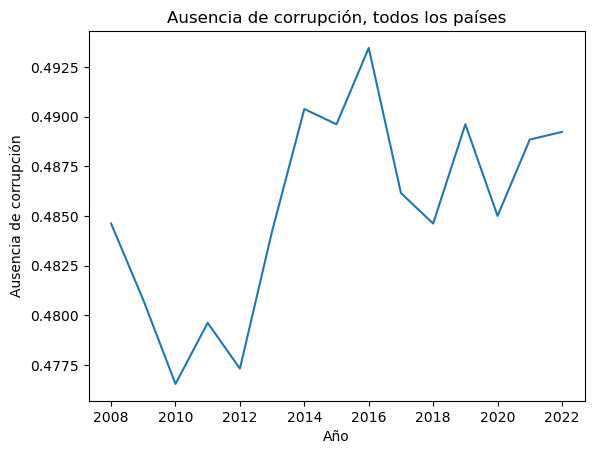

In [26]:
# Gráfico de líneas para indicador 'Absence of Corruption', países todos desde 2008 hasta 2022
sns.lineplot(corrupcion, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Ausencia de corrupción")
plt.title("Ausencia de corrupción, todos los países")
plt.show()

El tipo de indicador Absence of Corruption (Ausencia de corrupción) nos indica el grado con el que el aparato político de cada país puede operar sin estar comprometido por situaciones de corrupción de los servidores públicos, autoridades o instituciones del Estado. Nuestros datos indican que el promedio de las naciones por los años dados tienen un promedio de corrupción ligeramente mayor al 50% (es decir, que los aparatos estatales están comprometidos hasta por un 51% al menos) en cierto momento.

#### Public sector corrupt exchanges / Intercambios corruptos en el sector público

In [27]:
# Public sector corrupt exchanges
sobornos = df2.loc[(df2["Indicator"] == "Public sector corrupt exchanges")]
sobornos = sobornos.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Public sector corrupt exchanges")]

Country code                        Indicator  Year  Value
841             ARG  Public sector corrupt exchanges  2008   0.46
2538            BGR  Public sector corrupt exchanges  2008   0.48
3409            BRA  Public sector corrupt exchanges  2008   0.49
4749            CHN  Public sector corrupt exchanges  2008   0.30
5616            COL  Public sector corrupt exchanges  2008   0.43
...             ...                              ...   ...    ...
436268          RUS  Public sector corrupt exchanges  2022   0.33
436967          SEN  Public sector corrupt exchanges  2022   0.47
441439          UKR  Public sector corrupt exchanges  2022   0.42
441779          USA  Public sector corrupt exchanges  2022   0.71
442125          VEN  Public sector corrupt exchanges  2022   0.00

[390 rows x 4 columns]

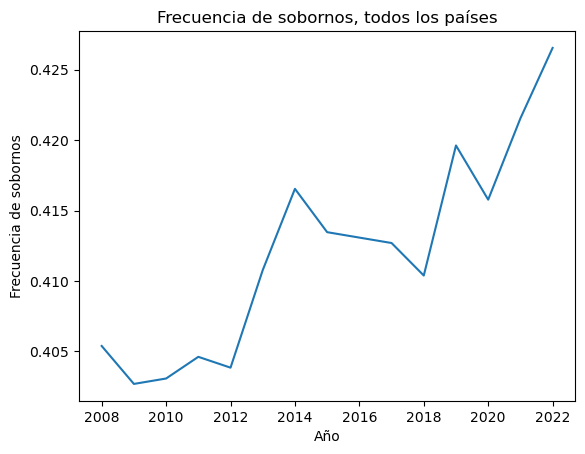

In [28]:
# Gráfico de líneas para indicador 'Public sector corrupt exchanges', países todos desde 2008 hasta 2022
sns.lineplot(sobornos, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Frecuencia de sobornos")
plt.title("Frecuencia de sobornos, todos los países")
plt.show()

El indicador public sector corrupt exchanges responde a la pregunta: ¿Con qué frecuencia los empleados del sector público otorgan favores a cambio de sobornos u otros incentivos materiales? La calificación 0 significa que es algo rutinario, esperado. La gráfica sugiere que, a pesar de que los países selectos tienen una rutina más o menos establecida, ha mejorado un poco a partir de la pandemia. ¿Podría significar que después de la pandemia se establecieron nuevos controles, personal corrupto faltó o la ciudadanía se mostró más reacia a cooperar?

#### Civil Liberties / Libertades civiles

In [29]:
# Civil Liberties
libertades = df2.loc[(df2["Indicator"] == "Civil Liberties")]
libertades = libertades.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Civil Liberties")]

Country code        Indicator  Year  Value
700             ARG  Civil Liberties  2008   0.80
2400            BGR  Civil Liberties  2008   0.75
3268            BRA  Civil Liberties  2008   0.81
4608            CHN  Civil Liberties  2008   0.29
5475            COL  Civil Liberties  2008   0.59
...             ...              ...   ...    ...
436127          RUS  Civil Liberties  2022   0.31
436829          SEN  Civil Liberties  2022   0.67
441298          UKR  Civil Liberties  2022   0.54
441647          USA  Civil Liberties  2022   0.82
441984          VEN  Civil Liberties  2022   0.37

[390 rows x 4 columns]

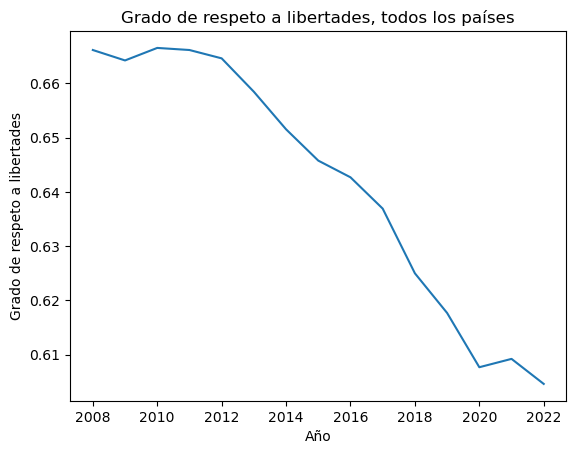

In [30]:
# Gráfico de líneas para indicador 'Civil Liberties', países todos desde 2008 hasta 2022
sns.lineplot(libertades, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Grado de respeto a libertades")
plt.title("Grado de respeto a libertades, todos los países")
plt.show()

El indicador, en términos sencillos, nos habla de qué tan fácil o factible es que una persona vea respetada sus libertades en su país por parte de las autoridades o Estado. Es notable el pronunciado declive a través de los años, lo que sugiere un aumento generalizado en la represión o autoritarismo de las naciones, aunque aún se mantiene por encima de un 50% de desempeño global.

#### Civil rights / Derechos civiles

In [31]:
# Civil rights
derechos = df2.loc[(df2["Indicator"] == "Civil rights")]
derechos = derechos.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Civil rights")]

Country code     Indicator  Year  Value
765             ARG  Civil rights  2008   0.67
2465            BGR  Civil rights  2008   0.89
3333            BRA  Civil rights  2008   0.67
4673            CHN  Civil rights  2008   0.11
5540            COL  Civil rights  2008   0.44
...             ...           ...   ...    ...
436019          ROU  Civil rights  2022   0.78
436192          RUS  Civil rights  2022   0.33
436894          SEN  Civil rights  2022   0.56
441363          UKR  Civil rights  2022   0.67
442049          VEN  Civil rights  2022   0.11

[300 rows x 4 columns]

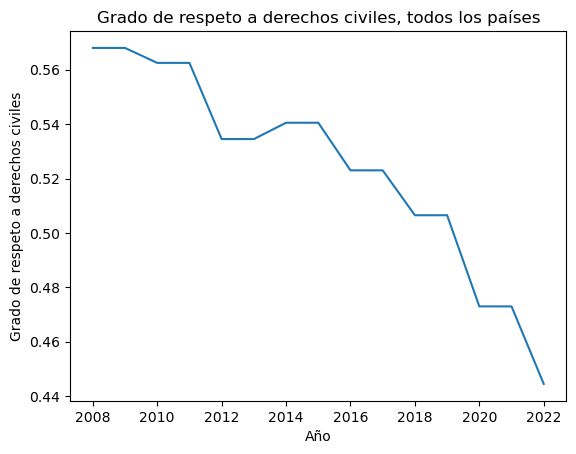

In [32]:
# Gráfico de líneas para indicador 'Civil rights', países todos desde 2008 hasta 2022
sns.lineplot(derechos, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Grado de respeto a derechos civiles")
plt.title("Grado de respeto a derechos civiles, todos los países")
plt.show()

Los Civil rights (derechos civiles) significan el grado de respeto que se recibe por parte de las instituciones y Estado. Una calificación de 0 significa que los derechos son sistemáticamente violados, sin posibilidad real de existir o ser protegidos por ley. Una calificación de 1 significa que, además de estar definidos, legislados y exigidos, las instituciones y Estado los reconocen plenamente.
Nuevamente, observamos una pronunciada bajada en la calificación global, en línea con el indicador anterior, pero esta vez pasando del 50% de rendimiento global negativo.

#### Judicial accountability / Responsabilidad judicial

In [33]:
# Judicial accountability
judicial = df2.loc[(df2["Indicator"] == "Judicial accountability")]
judicial = judicial.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Judicial accountability")]

Country code                Indicator  Year  Value
762             ARG  Judicial accountability  2008   0.37
2462            BGR  Judicial accountability  2008   0.36
3330            BRA  Judicial accountability  2008   0.57
4670            CHN  Judicial accountability  2008   0.56
5537            COL  Judicial accountability  2008   0.59
...             ...                      ...   ...    ...
436189          RUS  Judicial accountability  2022   0.55
436891          SEN  Judicial accountability  2022   0.58
441360          UKR  Judicial accountability  2022   0.50
441707          USA  Judicial accountability  2022   0.77
442046          VEN  Judicial accountability  2022   0.07

[390 rows x 4 columns]

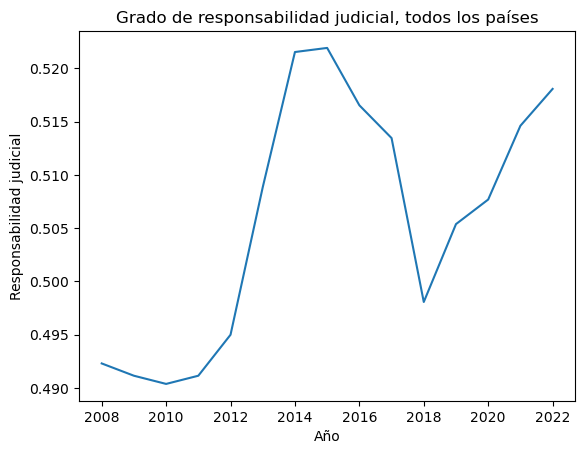

In [34]:
# Gráfico de líneas para indicador 'Judicial accountability', países todos desde 2008 hasta 2022
sns.lineplot(judicial, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Responsabilidad judicial")
plt.title("Grado de responsabilidad judicial, todos los países")
plt.show()

Este indicador habla sobre la frecuencia con la que los jueces o juzgadores son removidos de su cargo una vez son encontrados de cometer una falta grave. El gráfico muestra que hubo una mejora considerable en el desempeño global del 2010 al 2015, aunque esta misma se ve casi borrada para el año 2018. Una recuperación se aprecia durante la pandemia, situándose por encima del umbral del 50% de desempeño.

#### Educational equality / Igualdad educacional

In [35]:
# Educational equality
educacion = df2.loc[(df2["Indicator"] == "Educational equality")]
educacion = educacion.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Educational equality")]

Country code             Indicator  Year  Value
812             ARG  Educational equality  2008   0.56
2509            BGR  Educational equality  2008   0.65
3380            BRA  Educational equality  2008   0.37
4720            CHN  Educational equality  2008   0.42
5587            COL  Educational equality  2008   0.39
...             ...                   ...   ...    ...
436239          RUS  Educational equality  2022   0.51
436938          SEN  Educational equality  2022   0.50
441410          UKR  Educational equality  2022   0.65
441753          USA  Educational equality  2022   0.61
442096          VEN  Educational equality  2022   0.13

[390 rows x 4 columns]

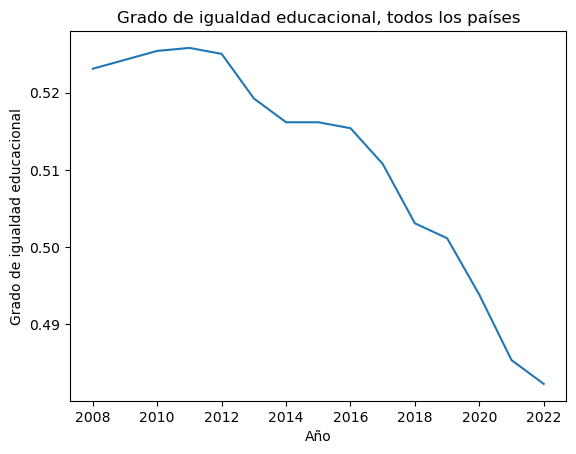

In [36]:
# Gráfico de líneas para indicador 'Educational equality', países todos desde 2008 hasta 2022
sns.lineplot(educacion, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Grado de igualdad educacional")
plt.title("Grado de igualdad educacional, todos los países")
plt.show()

El indicador responde a la pregunta: ¿En qué medida se garantiza a todos una educación básica de alta calidad, suficiente para permitirles ejercer sus derechos básicos como ciudadanos adultos?
El gráfico muestra que la educación se ve comprometida, alrededor de un 50% por los años de estudio. ¿A qué responderá el decrecimiento? ¿Exposición a una cultura de consumismo?

#### Health equality / Igualdad en salubridad

In [37]:
# Health equality 
salud = df2.loc[(df2["Indicator"] == "Health equality")]
salud = salud.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Health equality")]

Country code        Indicator  Year  Value
813             ARG  Health equality  2008   0.62
2510            BGR  Health equality  2008   0.68
3381            BRA  Health equality  2008   0.50
4721            CHN  Health equality  2008   0.37
5588            COL  Health equality  2008   0.42
...             ...              ...   ...    ...
436240          RUS  Health equality  2022   0.56
436939          SEN  Health equality  2022   0.51
441411          UKR  Health equality  2022   0.59
441754          USA  Health equality  2022   0.51
442097          VEN  Health equality  2022   0.05

[390 rows x 4 columns]

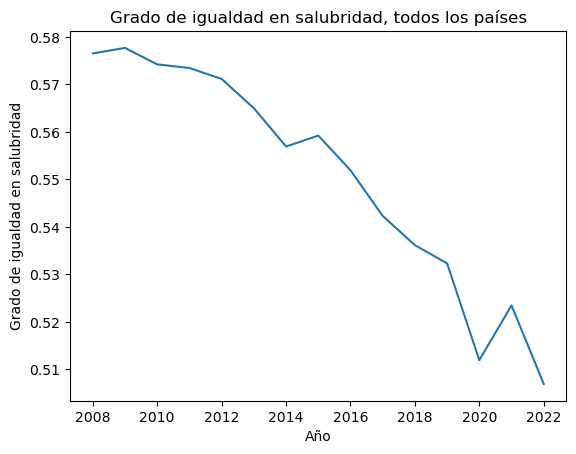

In [38]:
# Gráfico de líneas para indicador 'Health equality', países todos desde 2008 hasta 2022
sns.lineplot(salud, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Grado de igualdad en salubridad")
plt.title("Grado de igualdad en salubridad, todos los países")
plt.show()

Este indicador es particularmente interesante dado el contexto de la pandemia del COVID. El indicador responde a la accesibilidad de los ciudadanos a servicios de salud de alta calidad, para permitirles ejercer sus derechos políticos en la adultez. En franco declive desde 2008, la situación se ve un poco acelerada para 2019, tocando fondo en 2020 y teniendo un rebote. Aunque se aprecia un esfuerzo global por mejorar los servicios de salud en los países, nuevamente se pierde el avance para 2022.

#### Equal opportunity / Igualdad de oportunidades

In [39]:
# Equal opportunity
oportunidad = df2.loc[(df2["Indicator"] == "Equal opportunity")]
oportunidad = oportunidad.groupby("Year").mean(numeric_only = True)
df2.loc[(df2["Indicator"] == "Equal opportunity")]

Country code          Indicator  Year  Value
825             ARG  Equal opportunity  2008   0.67
2522            BGR  Equal opportunity  2008   0.78
3393            BRA  Equal opportunity  2008   0.67
4733            CHN  Equal opportunity  2008   0.33
5600            COL  Equal opportunity  2008   0.56
...             ...                ...   ...    ...
436076          ROU  Equal opportunity  2022   0.67
436252          RUS  Equal opportunity  2022   0.56
436951          SEN  Equal opportunity  2022   0.44
441423          UKR  Equal opportunity  2022   0.67
442109          VEN  Equal opportunity  2022   0.44

[300 rows x 4 columns]

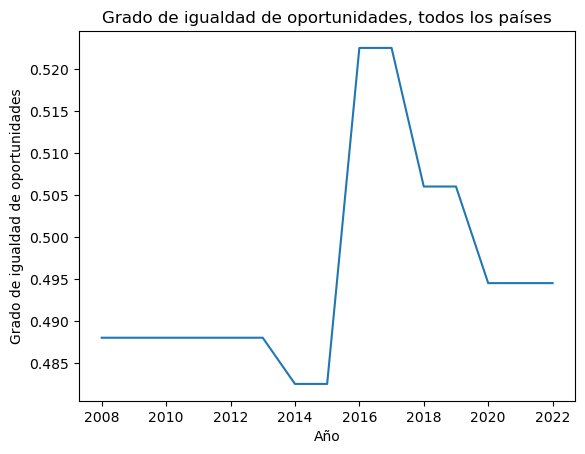

In [40]:
# Gráfico de líneas para indicador 'Equal opportunity', países todos desde 2008 hasta 2022
sns.lineplot(oportunidad, x = 'Year', y = 'Value')
plt.xlabel("Año")
plt.ylabel("Grado de igualdad de oportunidades")
plt.title("Grado de igualdad de oportunidades, todos los países")
plt.show()

Más que una cuestión de oportunidades profesionales o educativas, este indicador nos habla del grado de igualdad a nivel social, con énfasis en mujeres, grupos étnicos y religiosos. El indicador reacciona en 2015 después de un breve descenso en 2014, para llegar a un alto en 2016 y 2017. Aunque el indicador se mueve entorno al 50% de desempeño global, se establece un nuevo suelo alrededor del 49.5% mismo que nos indica un avance global sin un descenso próximo aparente.

### Gráficos interactivos

Usamos la librería de Widgets y Plotly para crear gráficos interactivos, ya que nuestro dataset contiene muchas filas de información que complican la visualización 

Debido a la extensión de los registros, adaptamos una sección de gráficos interactivos (barras y boxplots) para obtener de un vistazo el desempeño de cada país por separado, enfocándonos en valores promedio a través de los años.

In [41]:
# Creación de menú desplegable para uso en gráficos interactivos
country_dropdown = widgets.Dropdown(
    options=df2['Country code'].unique(),
    description='Country:',
    value='ARG'
)

In [42]:
# Definición de fórmula para gráfico de barras interactivo
def update_barplot(country):
    paisselect = df2[df2['Country code'] == country]
    aggregated_df = paisselect.groupby('Indicator')['Value'].mean().reset_index()
    fig = px.bar(aggregated_df, x='Indicator', y='Value', title=f'Average Value by Indicator for {country}')
    fig.show()

widgets.interact(update_barplot, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('ARG', 'BGR', 'BRA', 'CHN', 'COL', 'CUB', 'DEU…

<function __main__.update_barplot(country)>

Las barras son un promedio por todos los años para cada indicador. ¿Qué países tienen una calificación más alta en cada indicador? ¿Cuáles indicadores son más comunes de encontrar con calificaciones bajas?
Podemos entender que los factores culturales, políticos y sociales determinan el desempeño de cada país, aunque también hay factores externos como la pandemia del COVID que hacen que cada país reaccione de manera diferente.

In [43]:
# Definición de función para crear una boxplot interactiva
def update_boxplot(country):
    paisselect = df2[df2['Country code'] == country]
    fig = px.box(paisselect, x='Indicator', y='Value', title=f'Value Distribution for {country}')
    fig.show()

widgets.interact(update_boxplot, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', options=('ARG', 'BGR', 'BRA', 'CHN', 'COL', 'CUB', 'DEU…

<function __main__.update_boxplot(country)>

Las boxplots nos ayudan a entender estadísticamente el comportamiento de las variables, así como entender cómo se distribuyen de manera general.
Observamos que los países difieren mucho respecto al área que ocupan (del 0 al 1) si contamos la extensión que toman los whiskers (límites superiores e inferiores). El rango intercuantil (área de la caja interna) nos muestra más puntualmente la escencia del desempeño del país. Los outliers (valores atípicos) pueden explicar que hubo un año donde ocurrió un evento en especial.

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



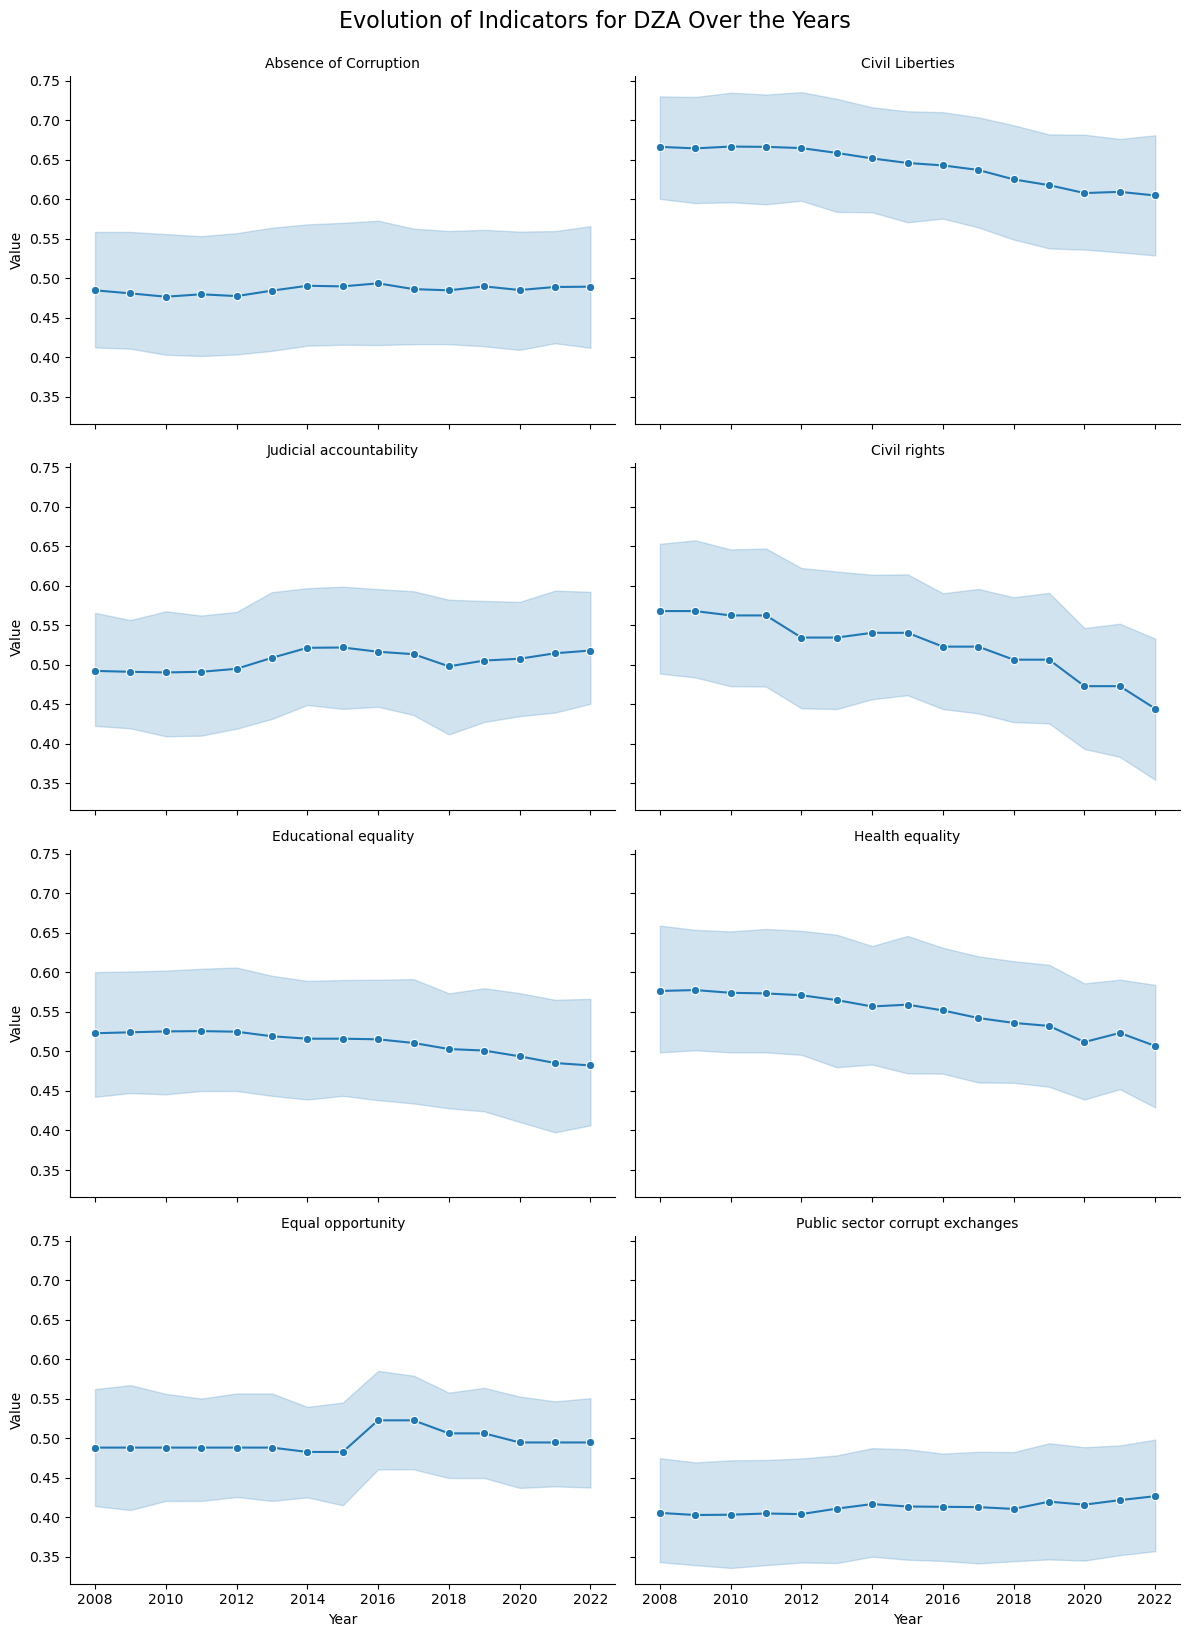

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



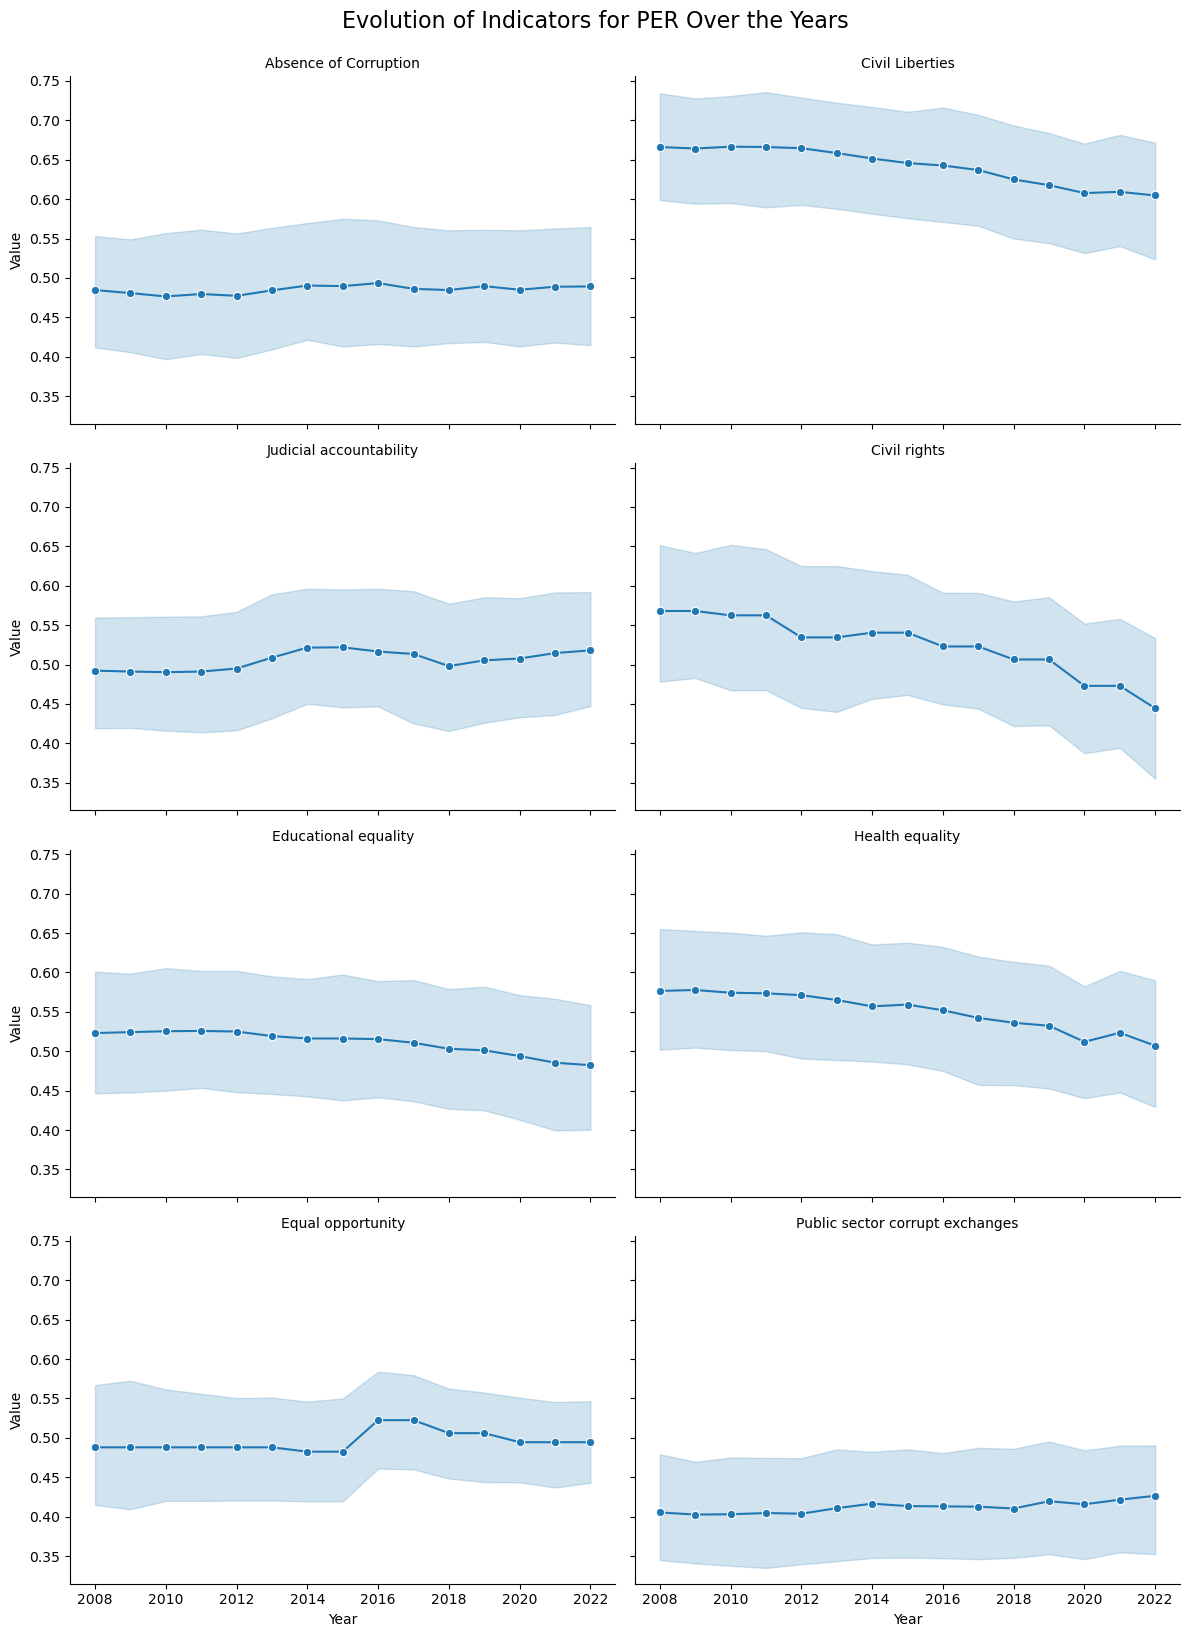

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



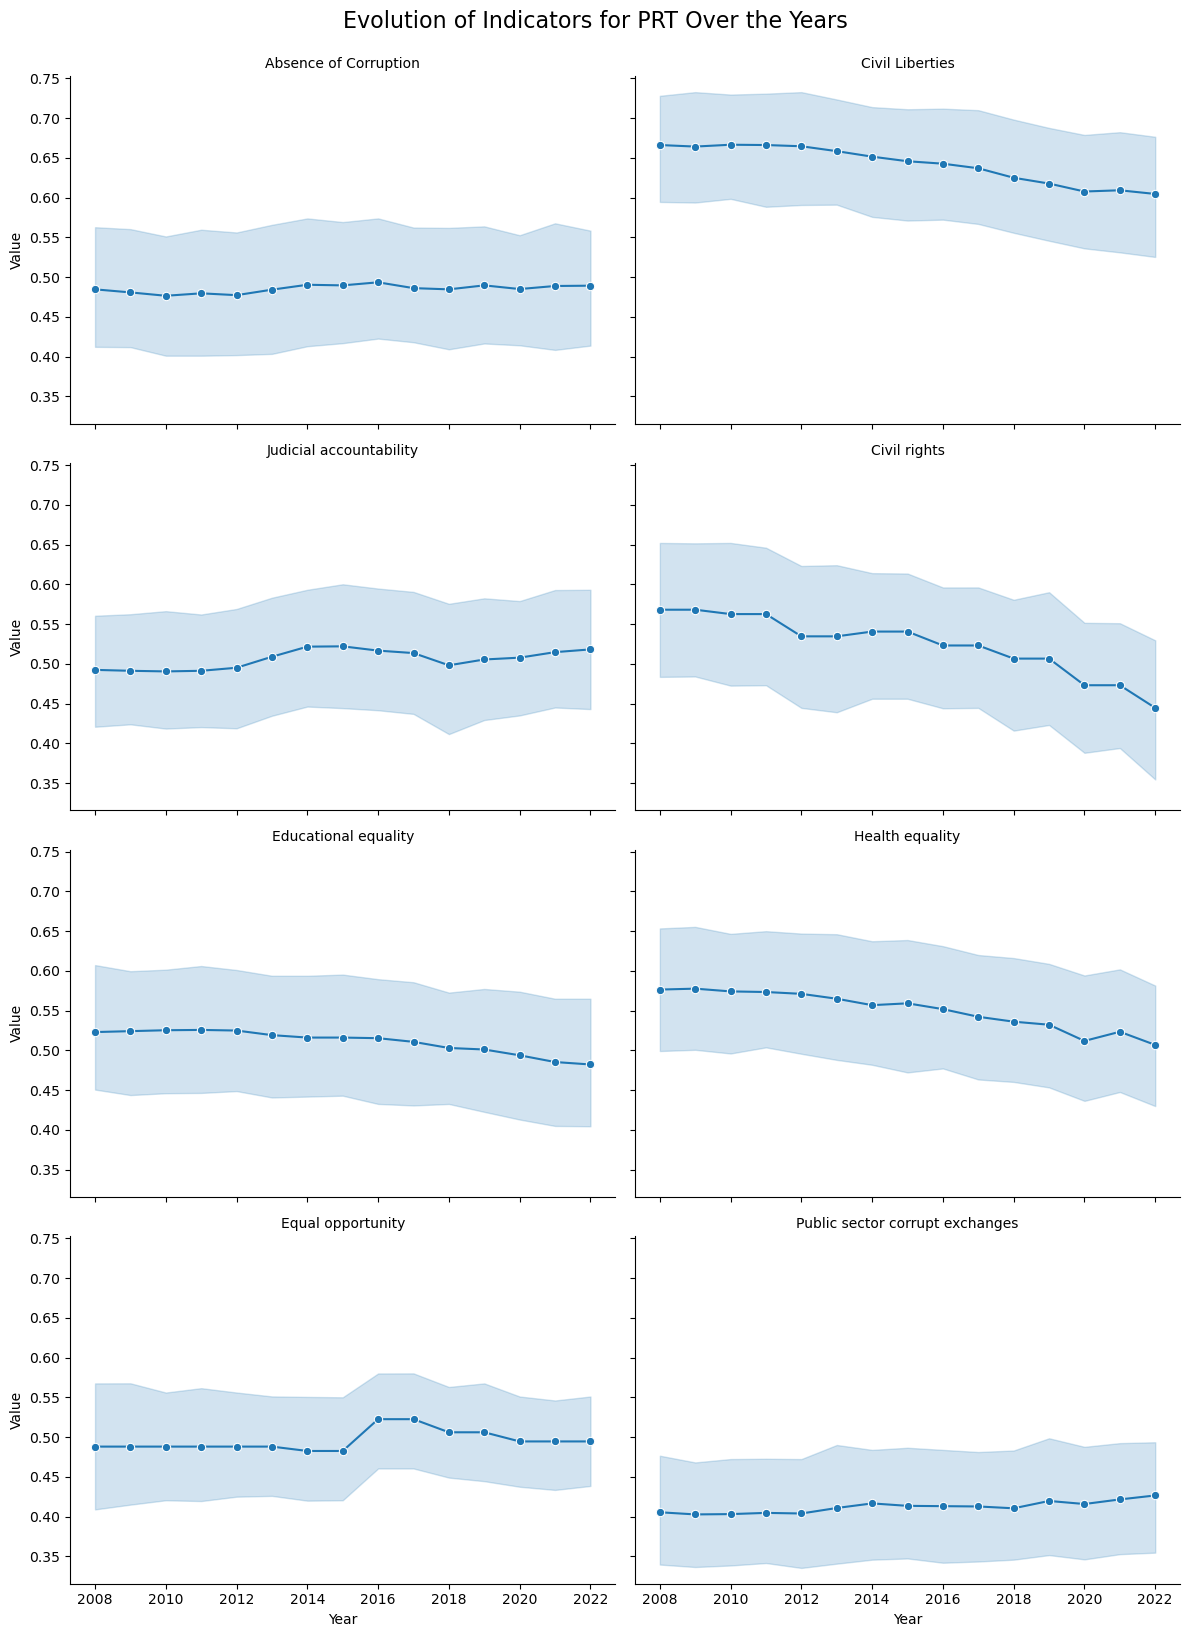

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



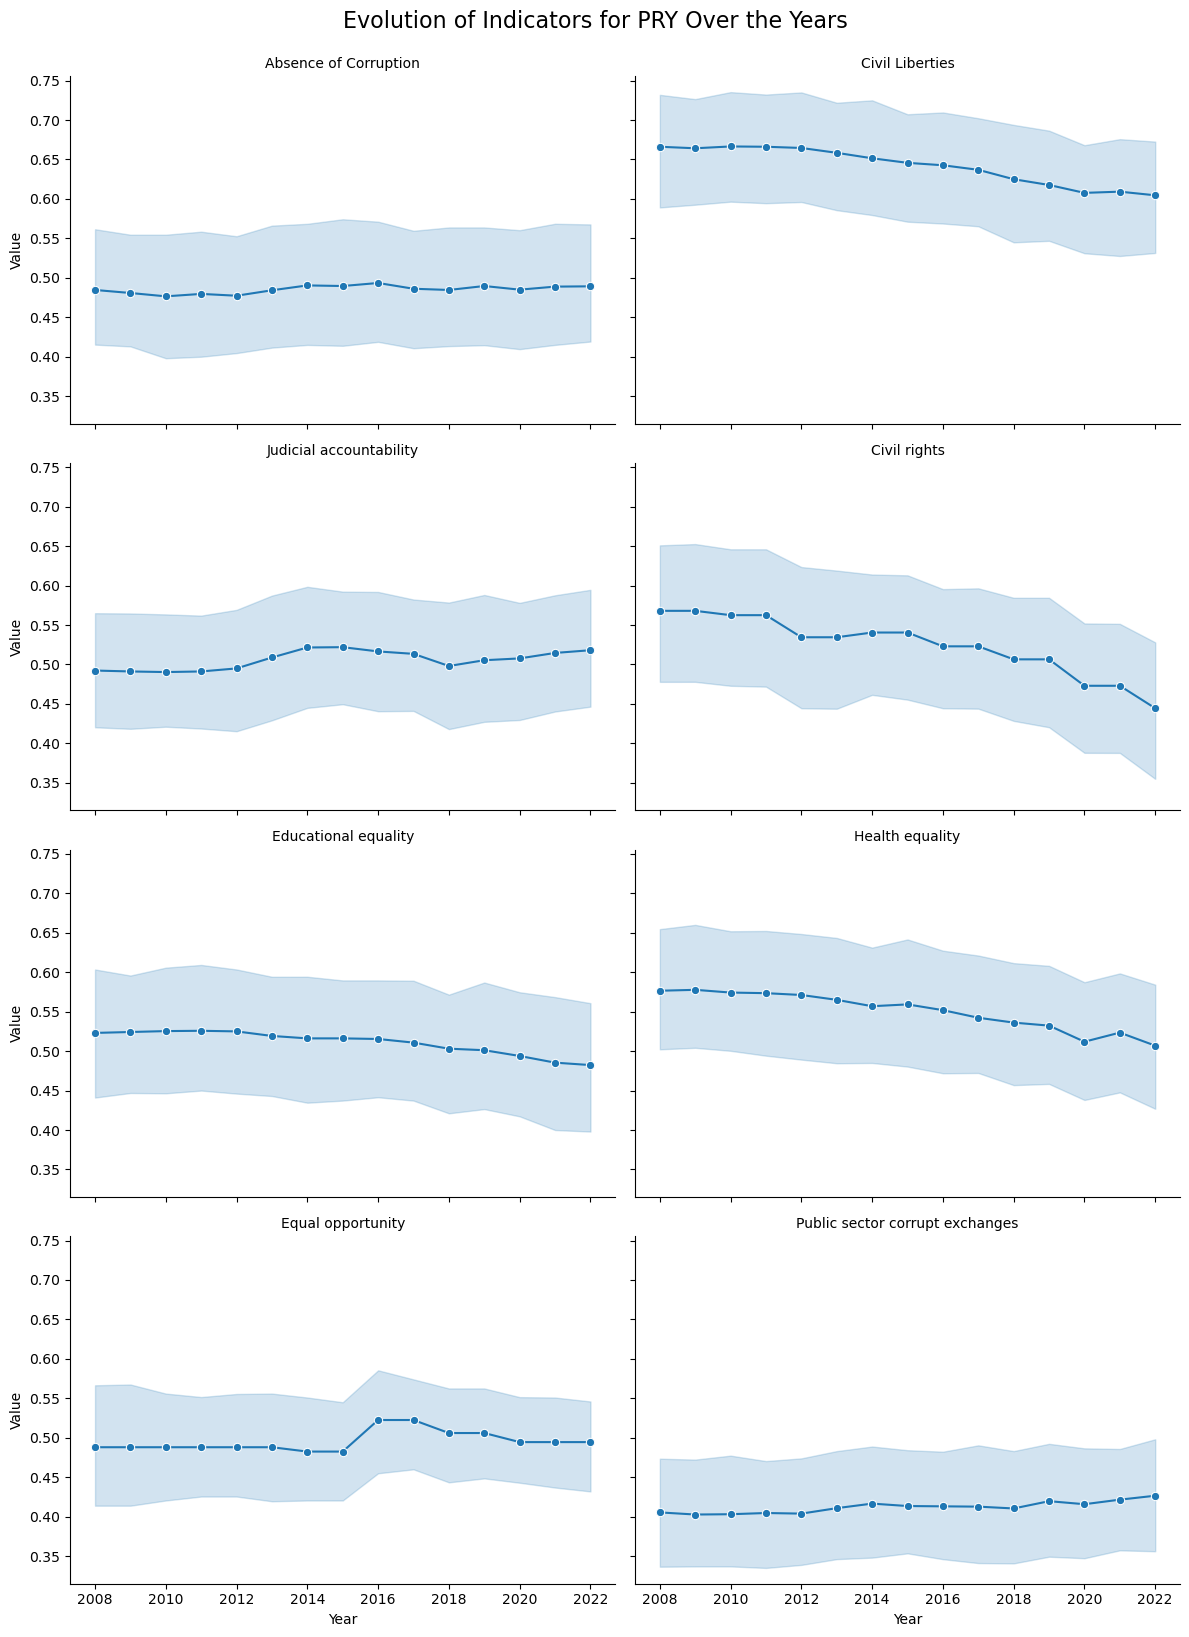

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



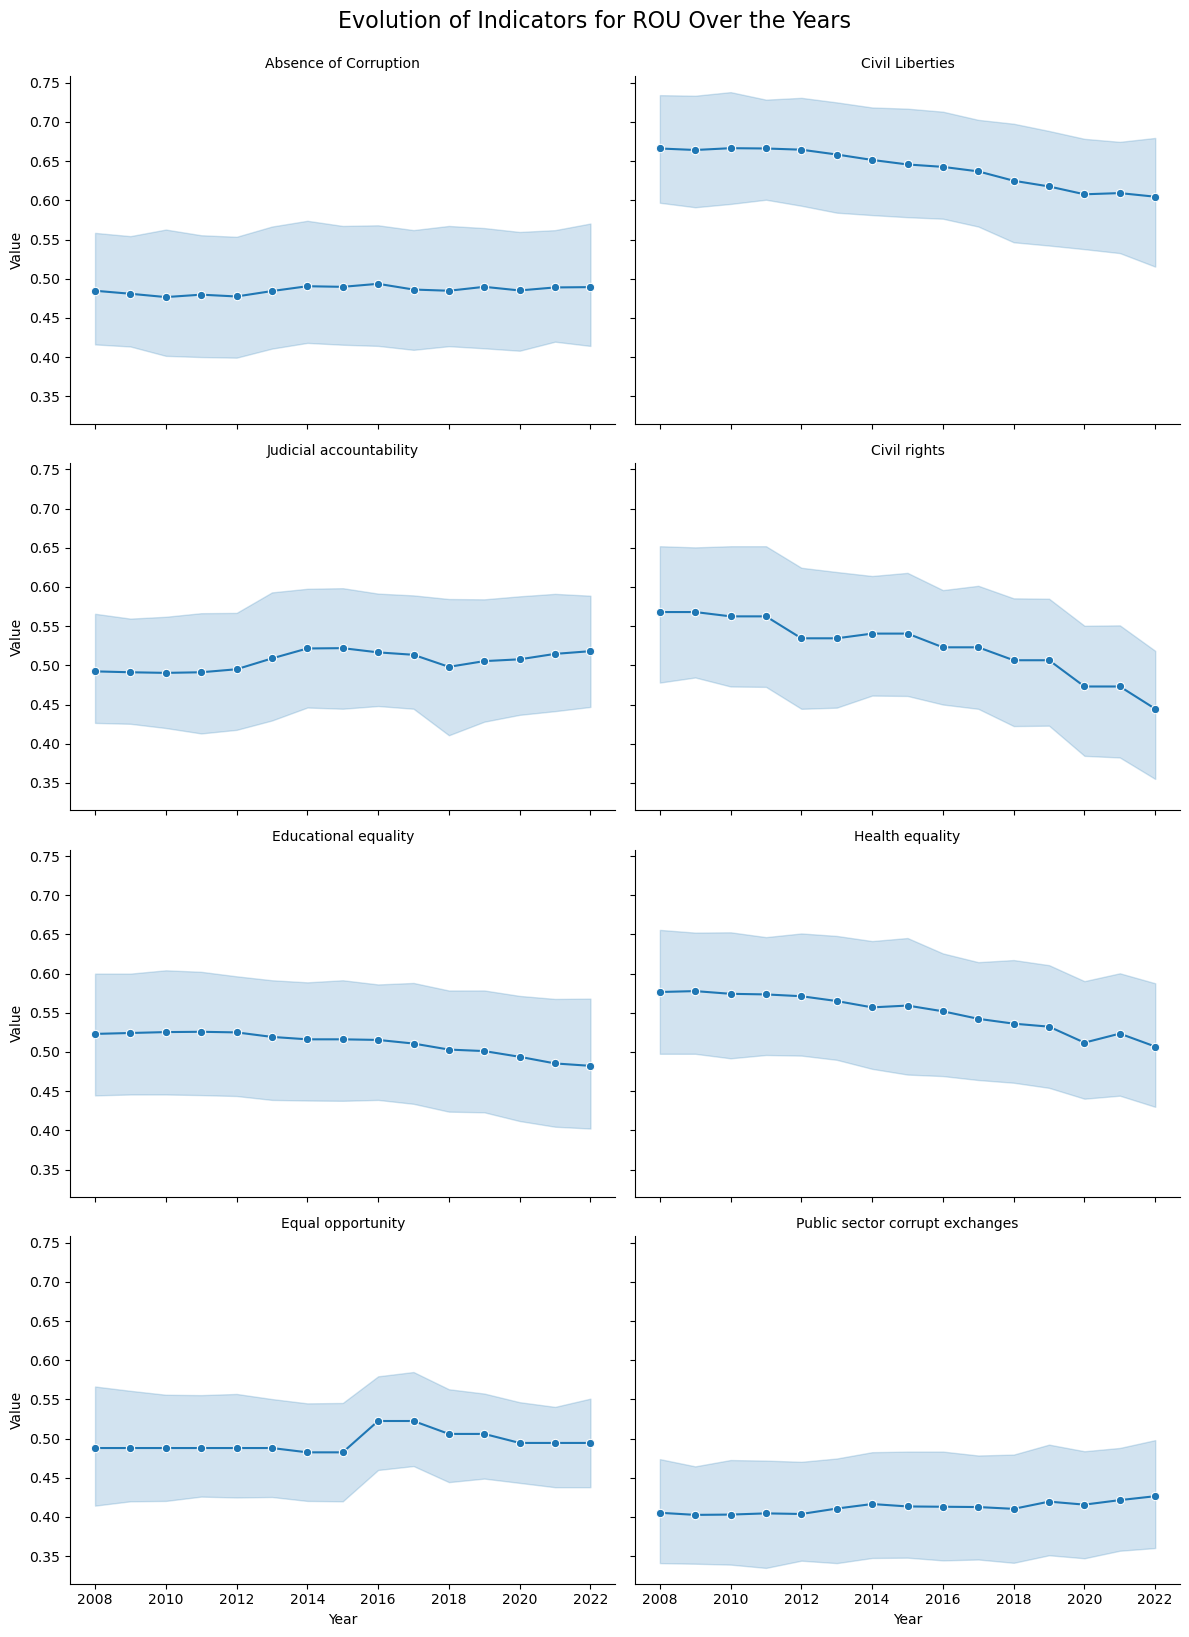

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



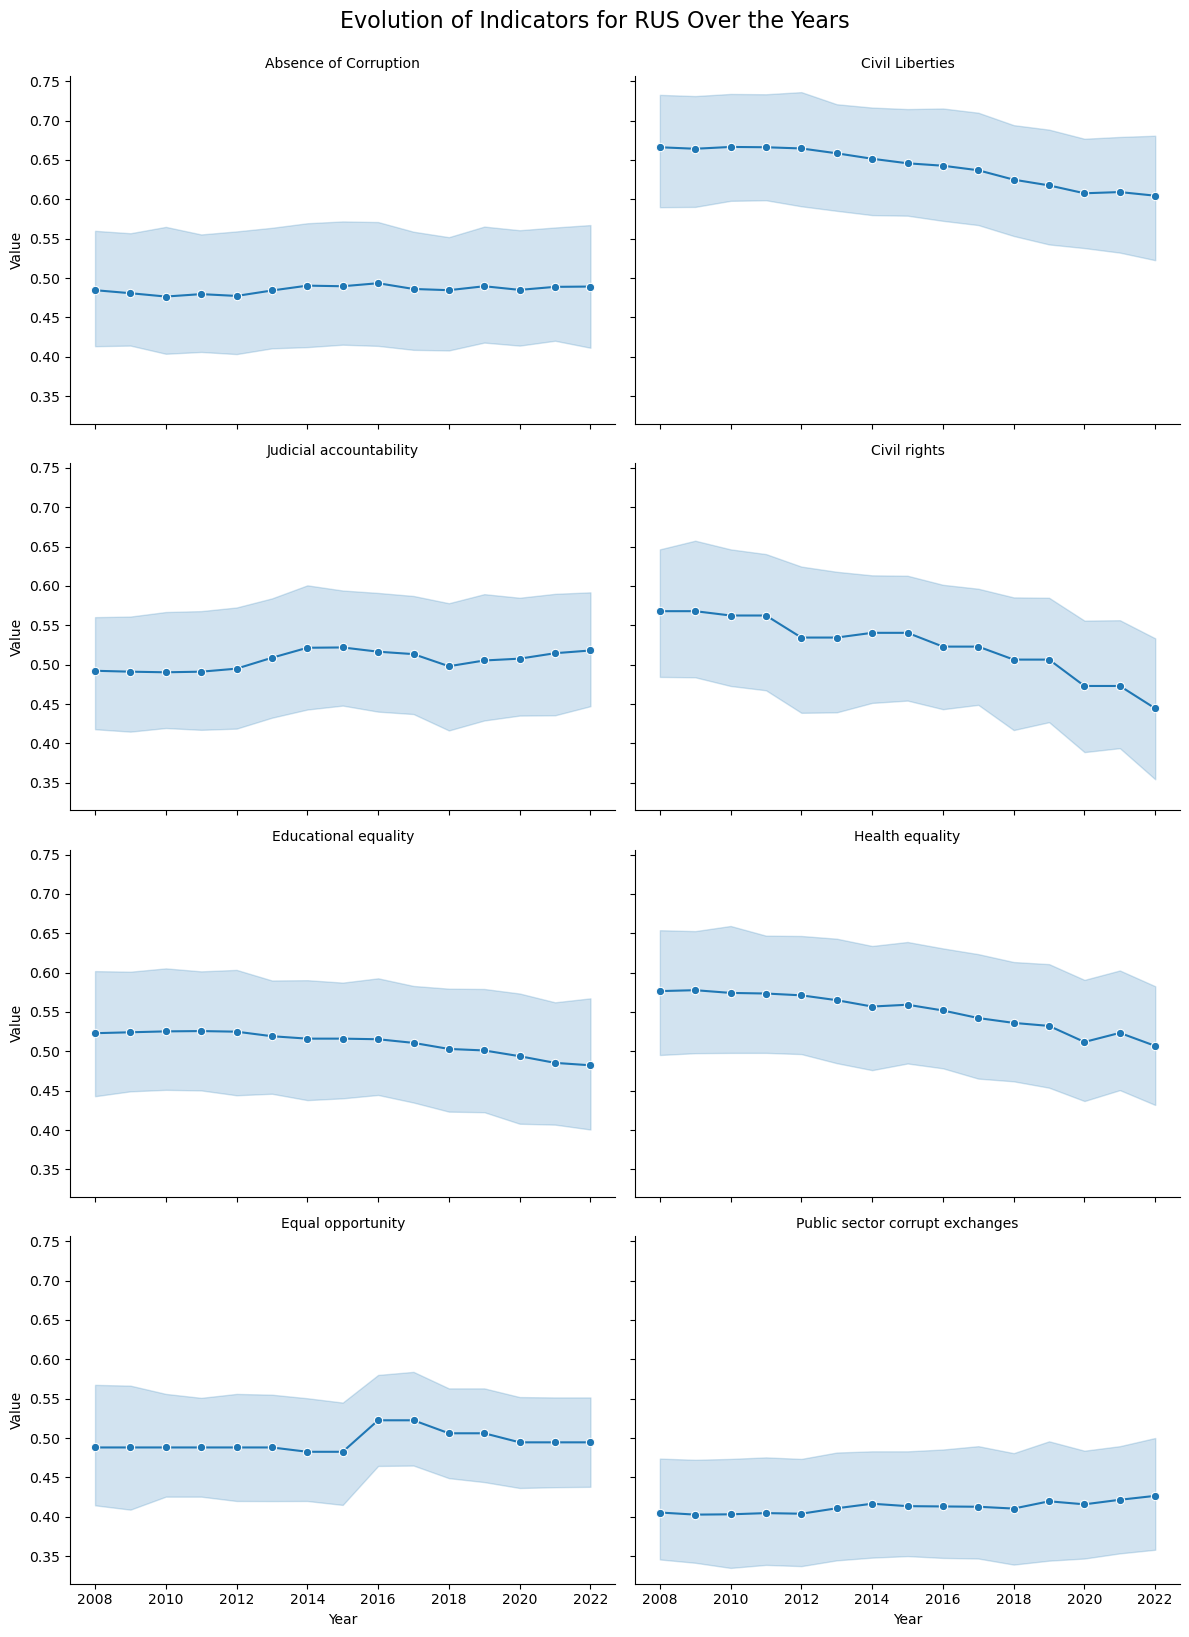

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



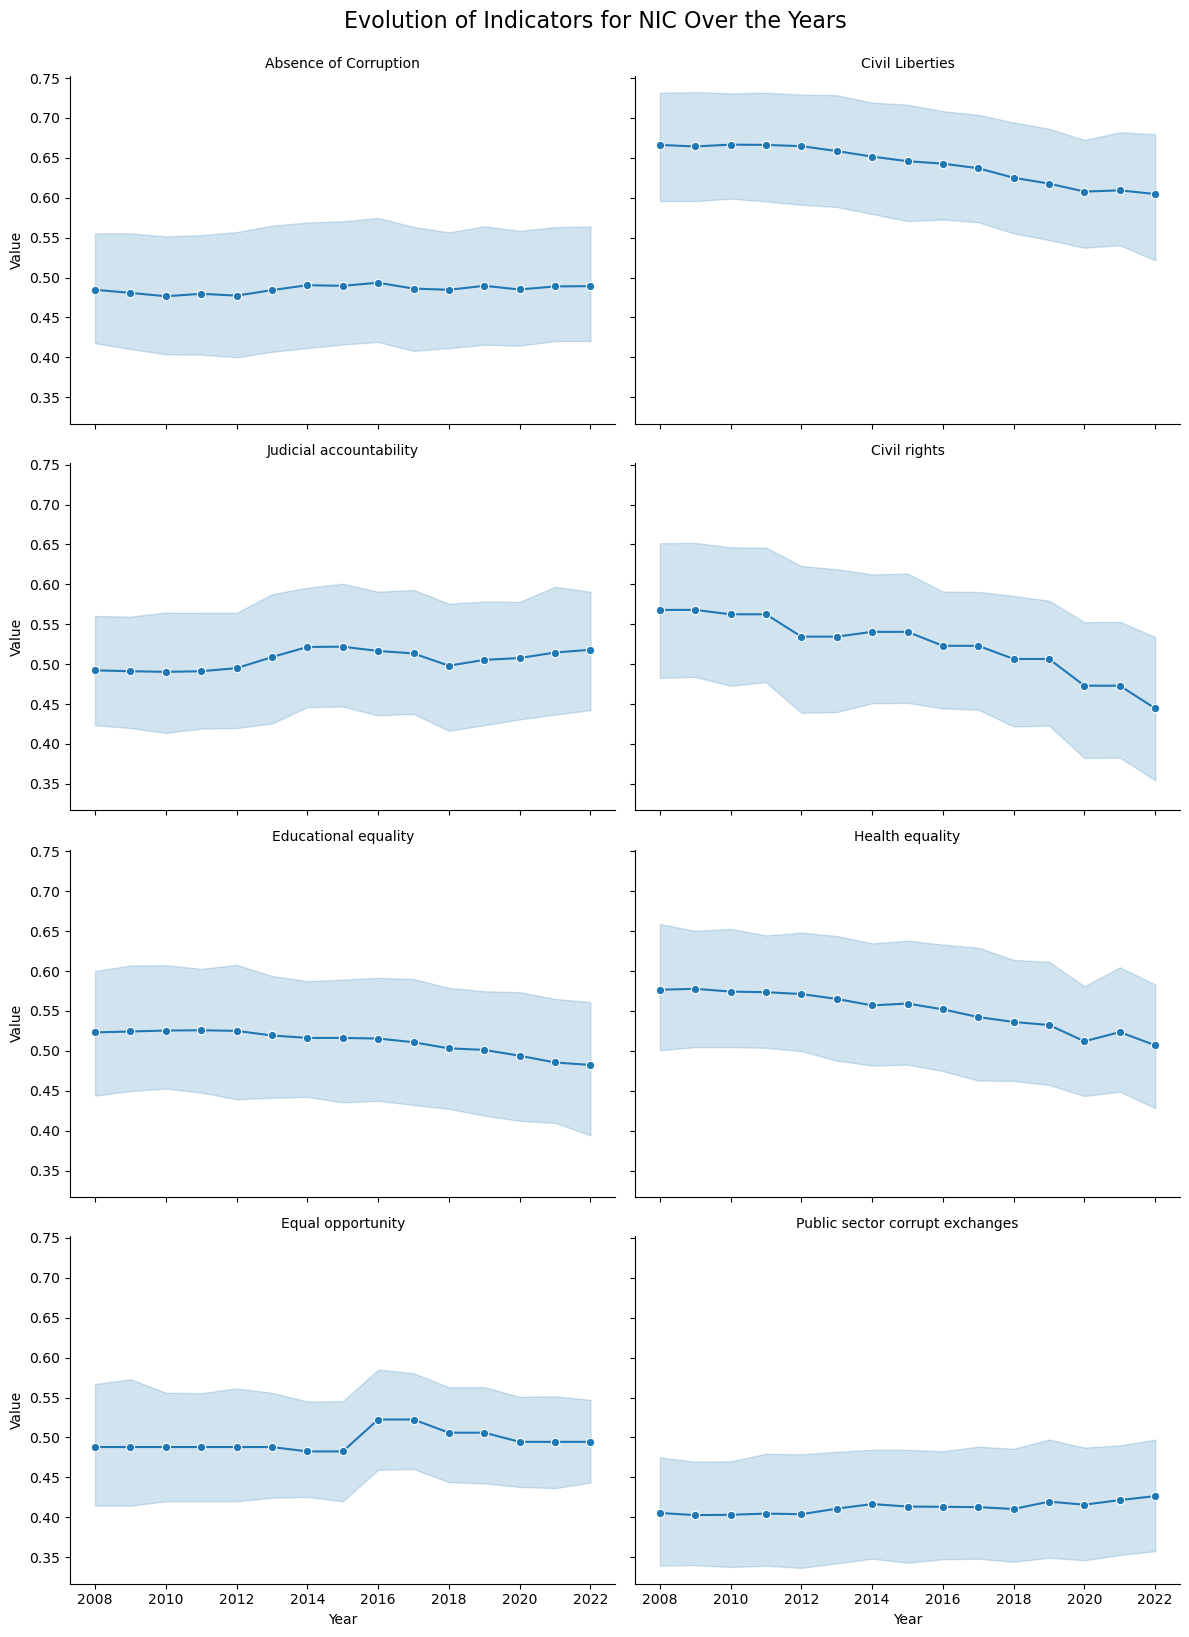

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



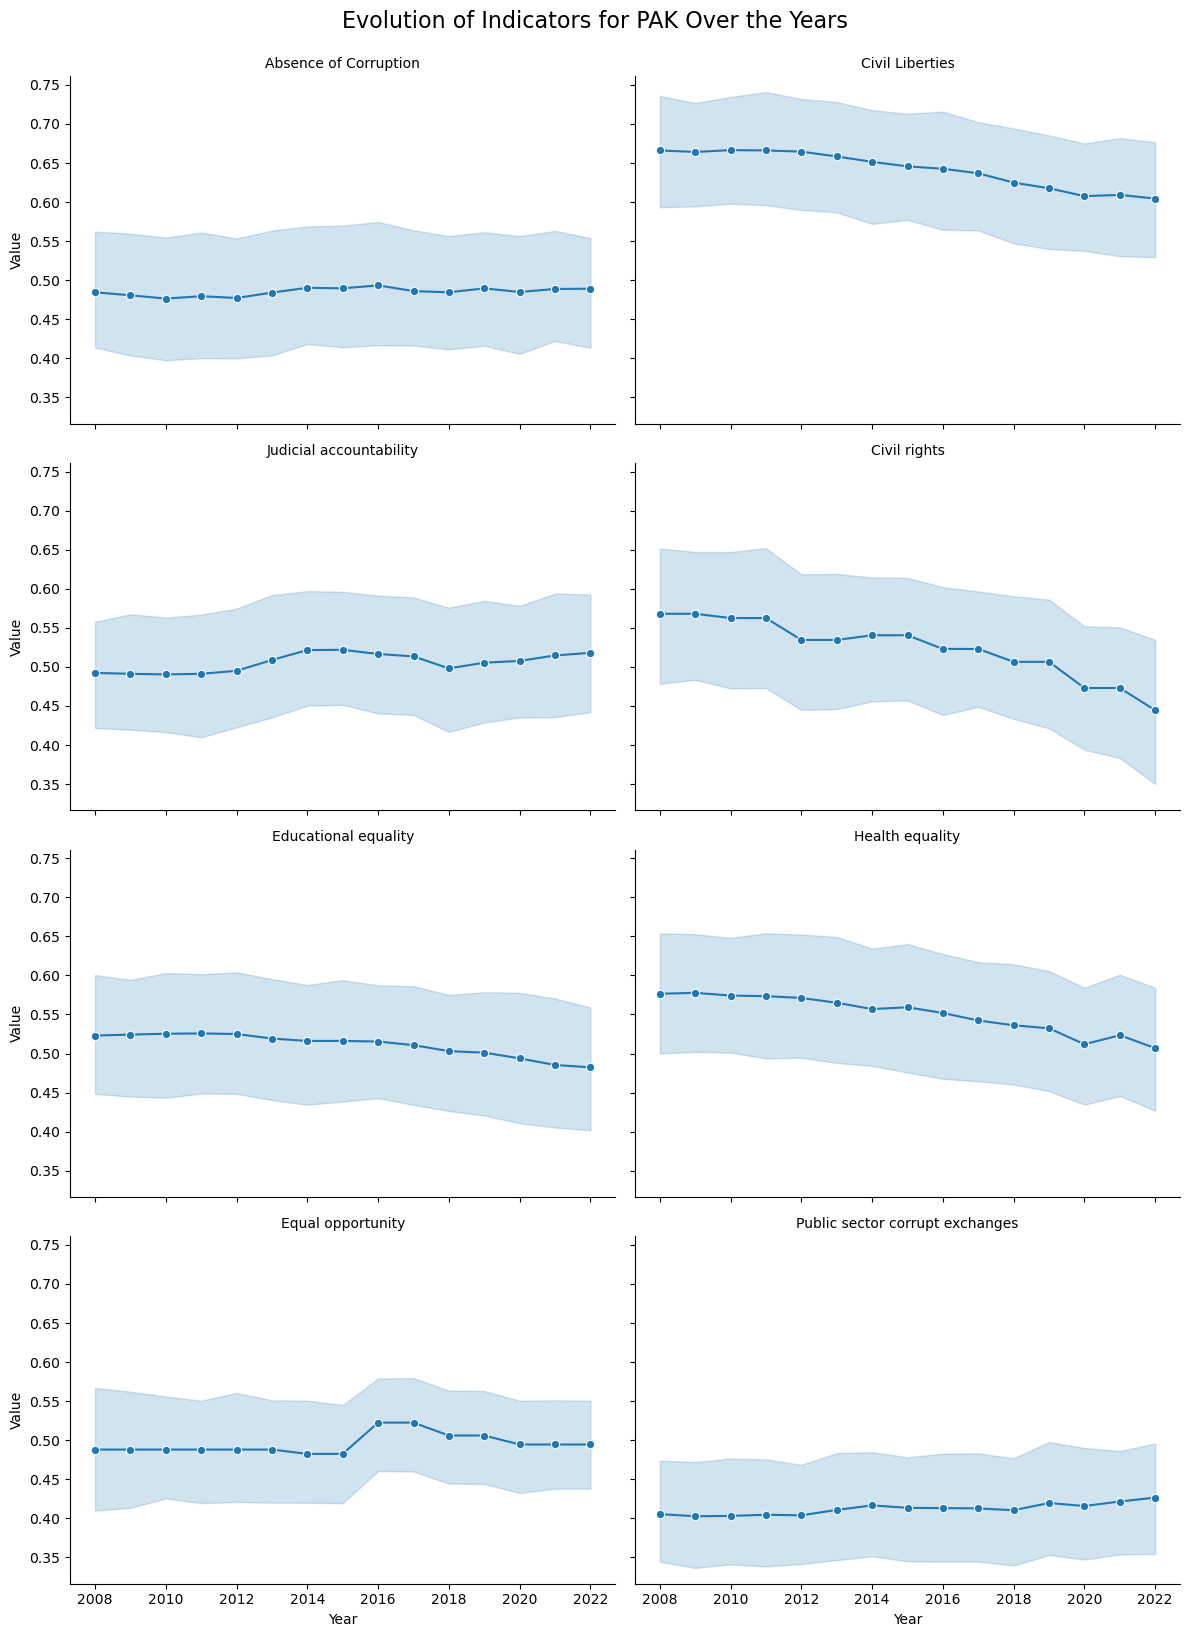

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



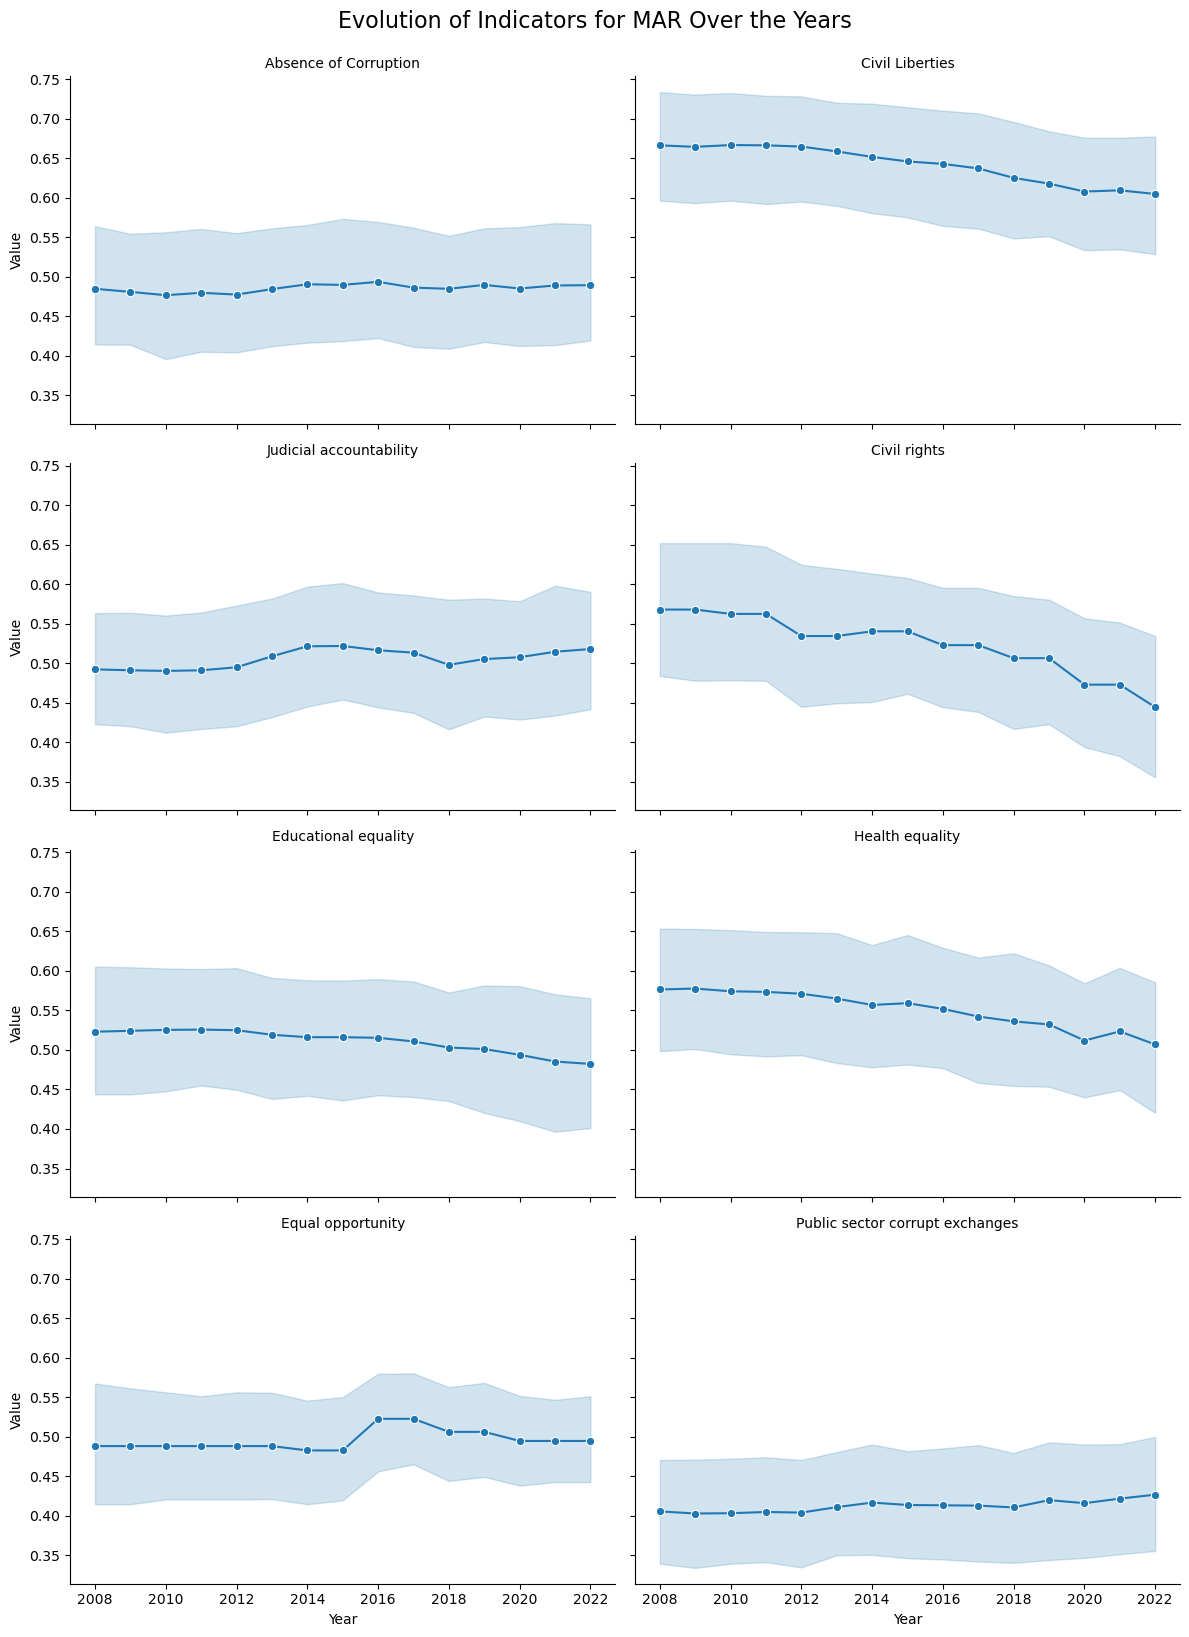

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



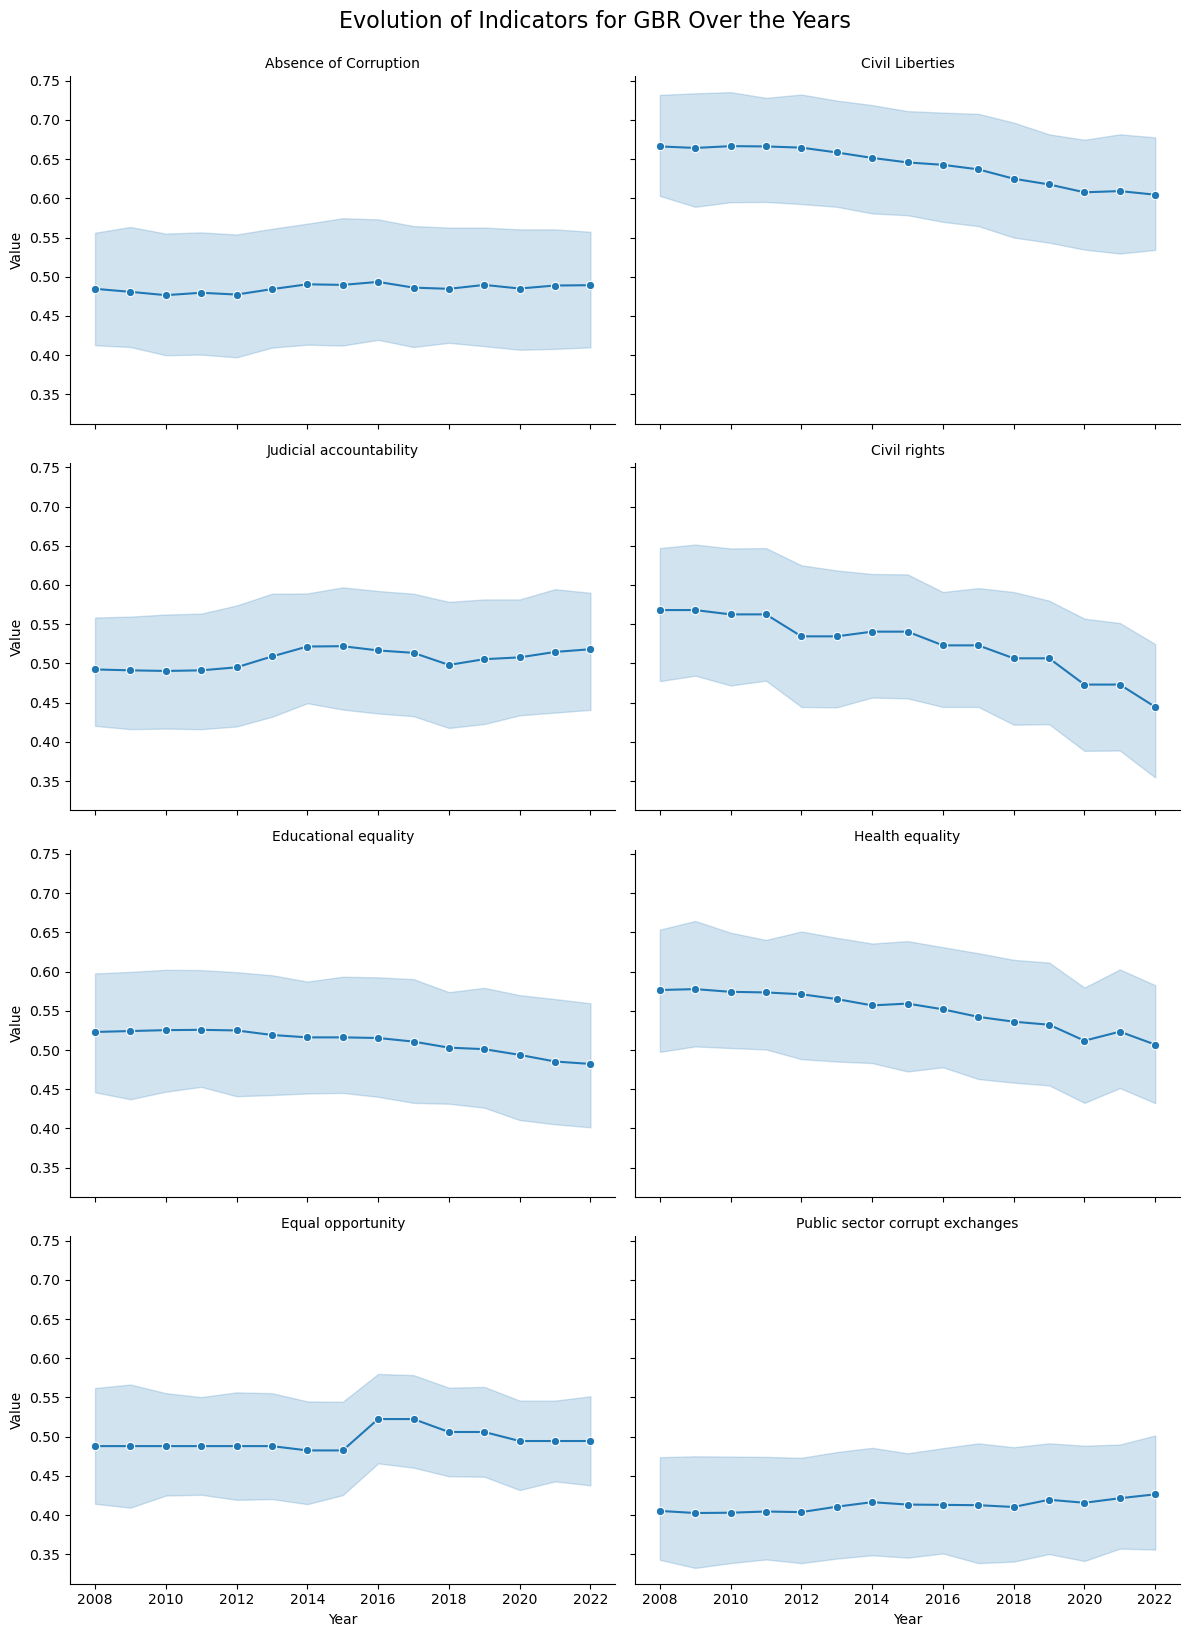

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



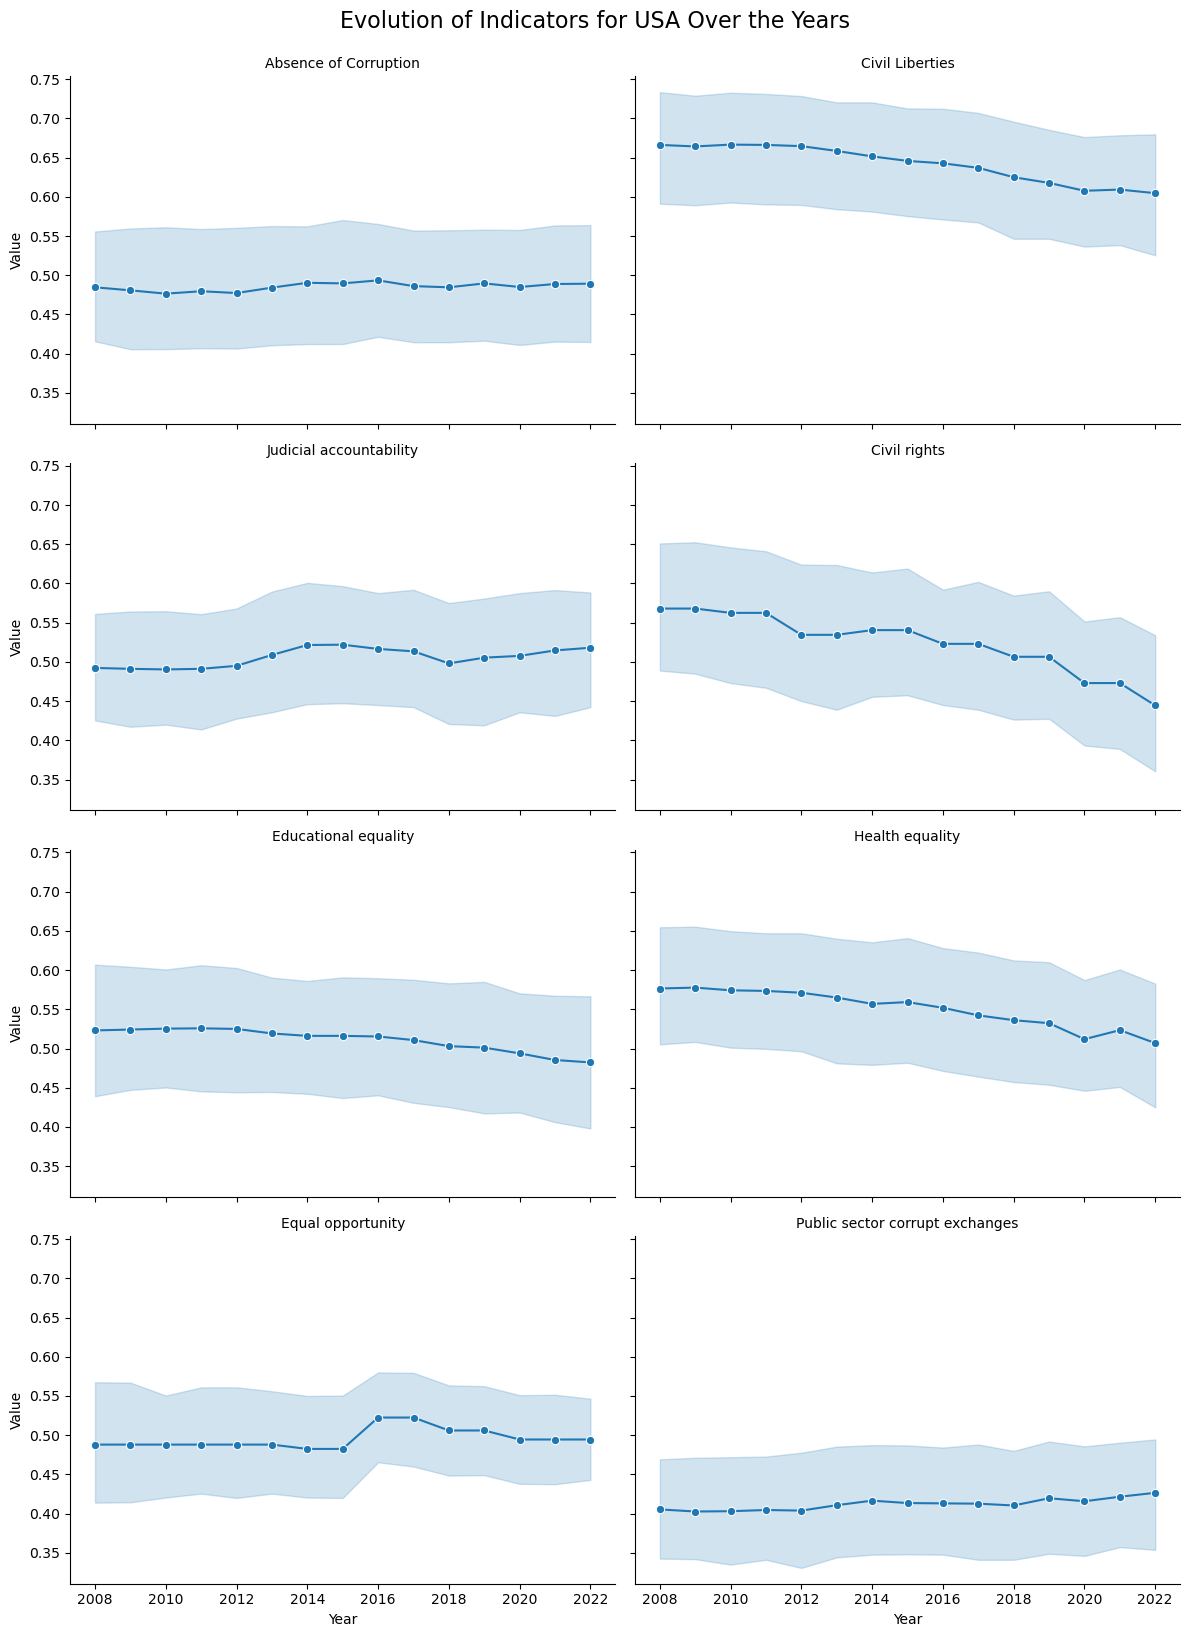

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



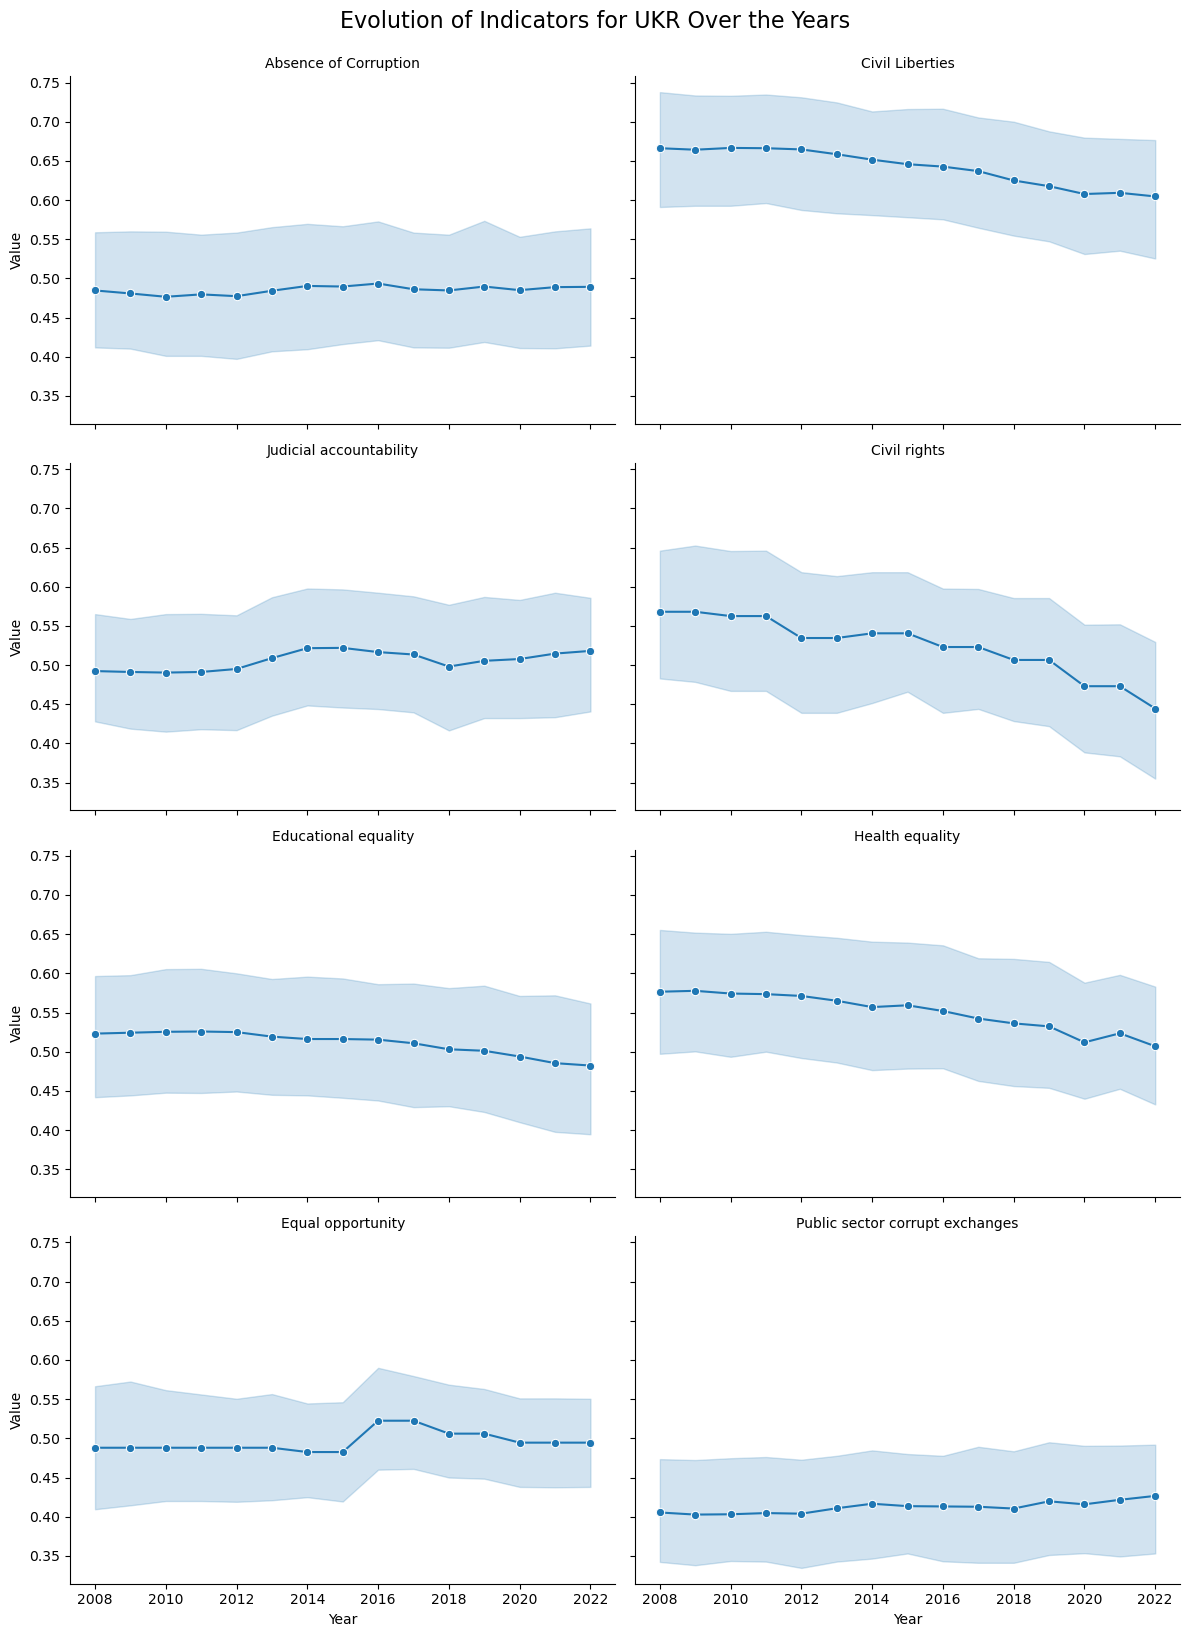

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



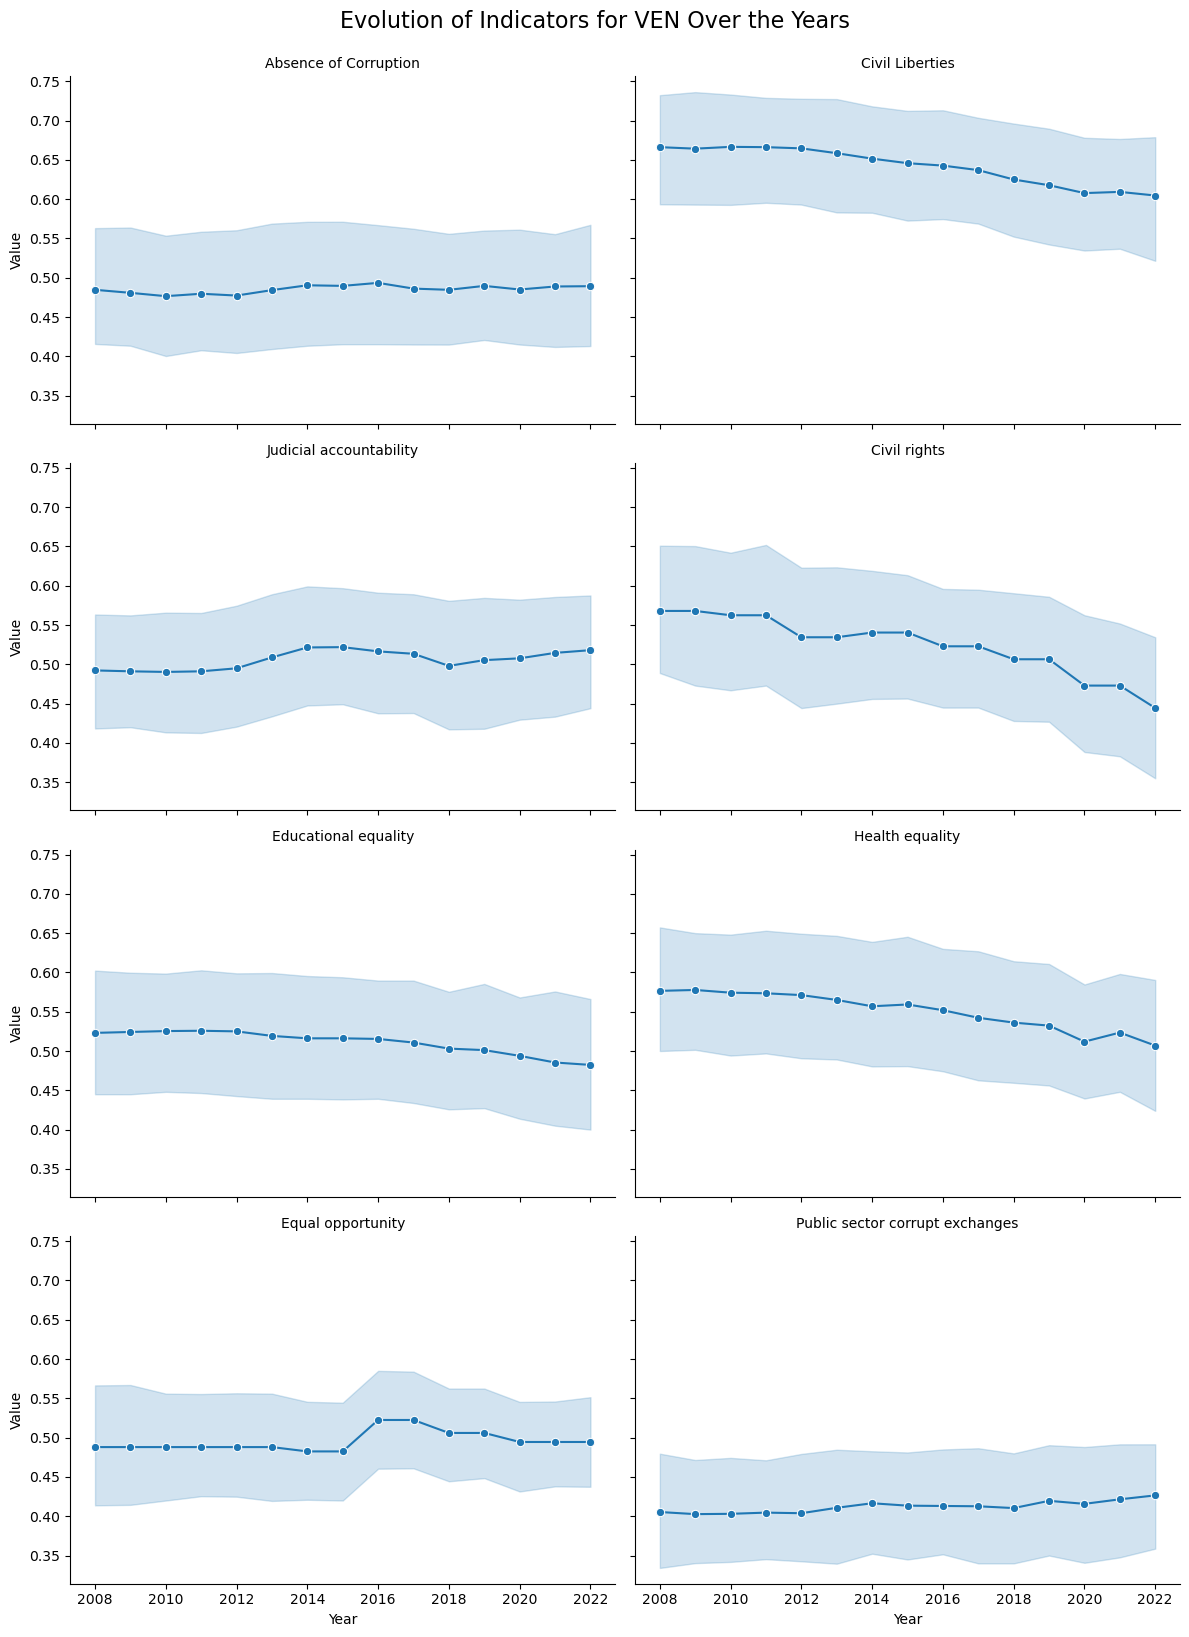

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



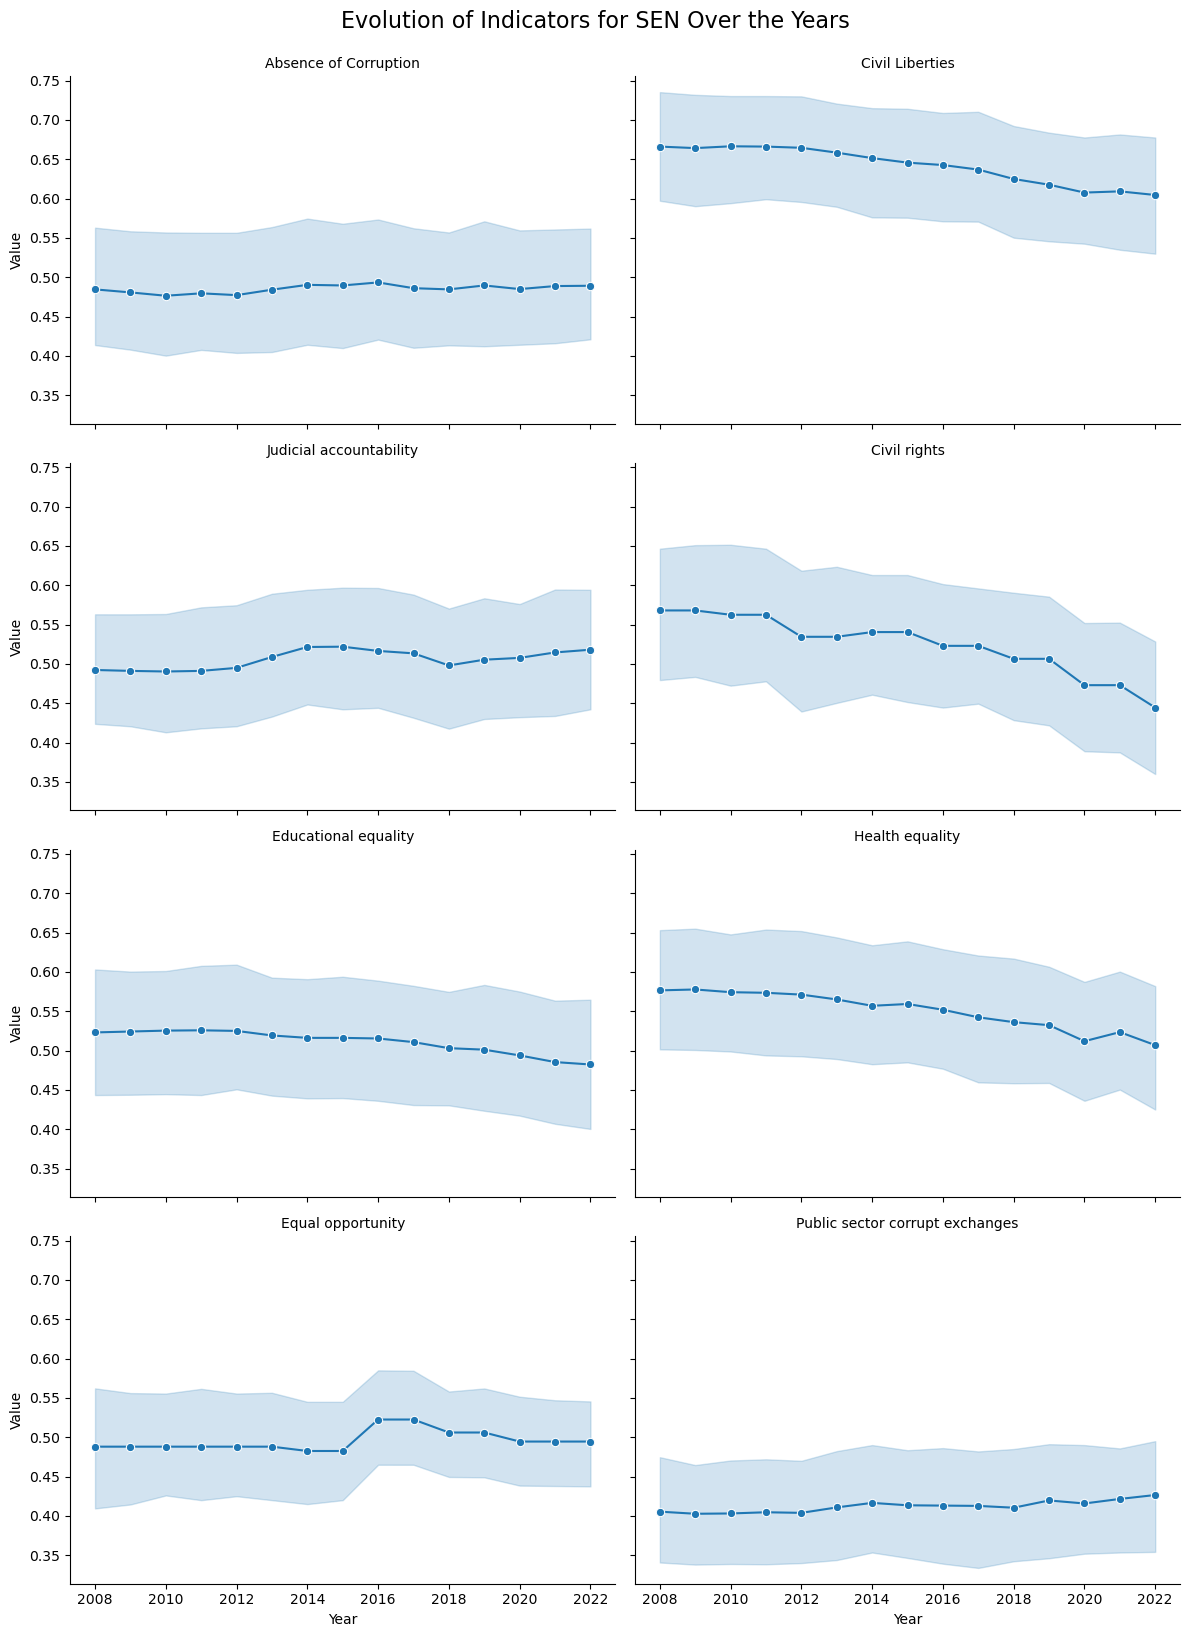

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



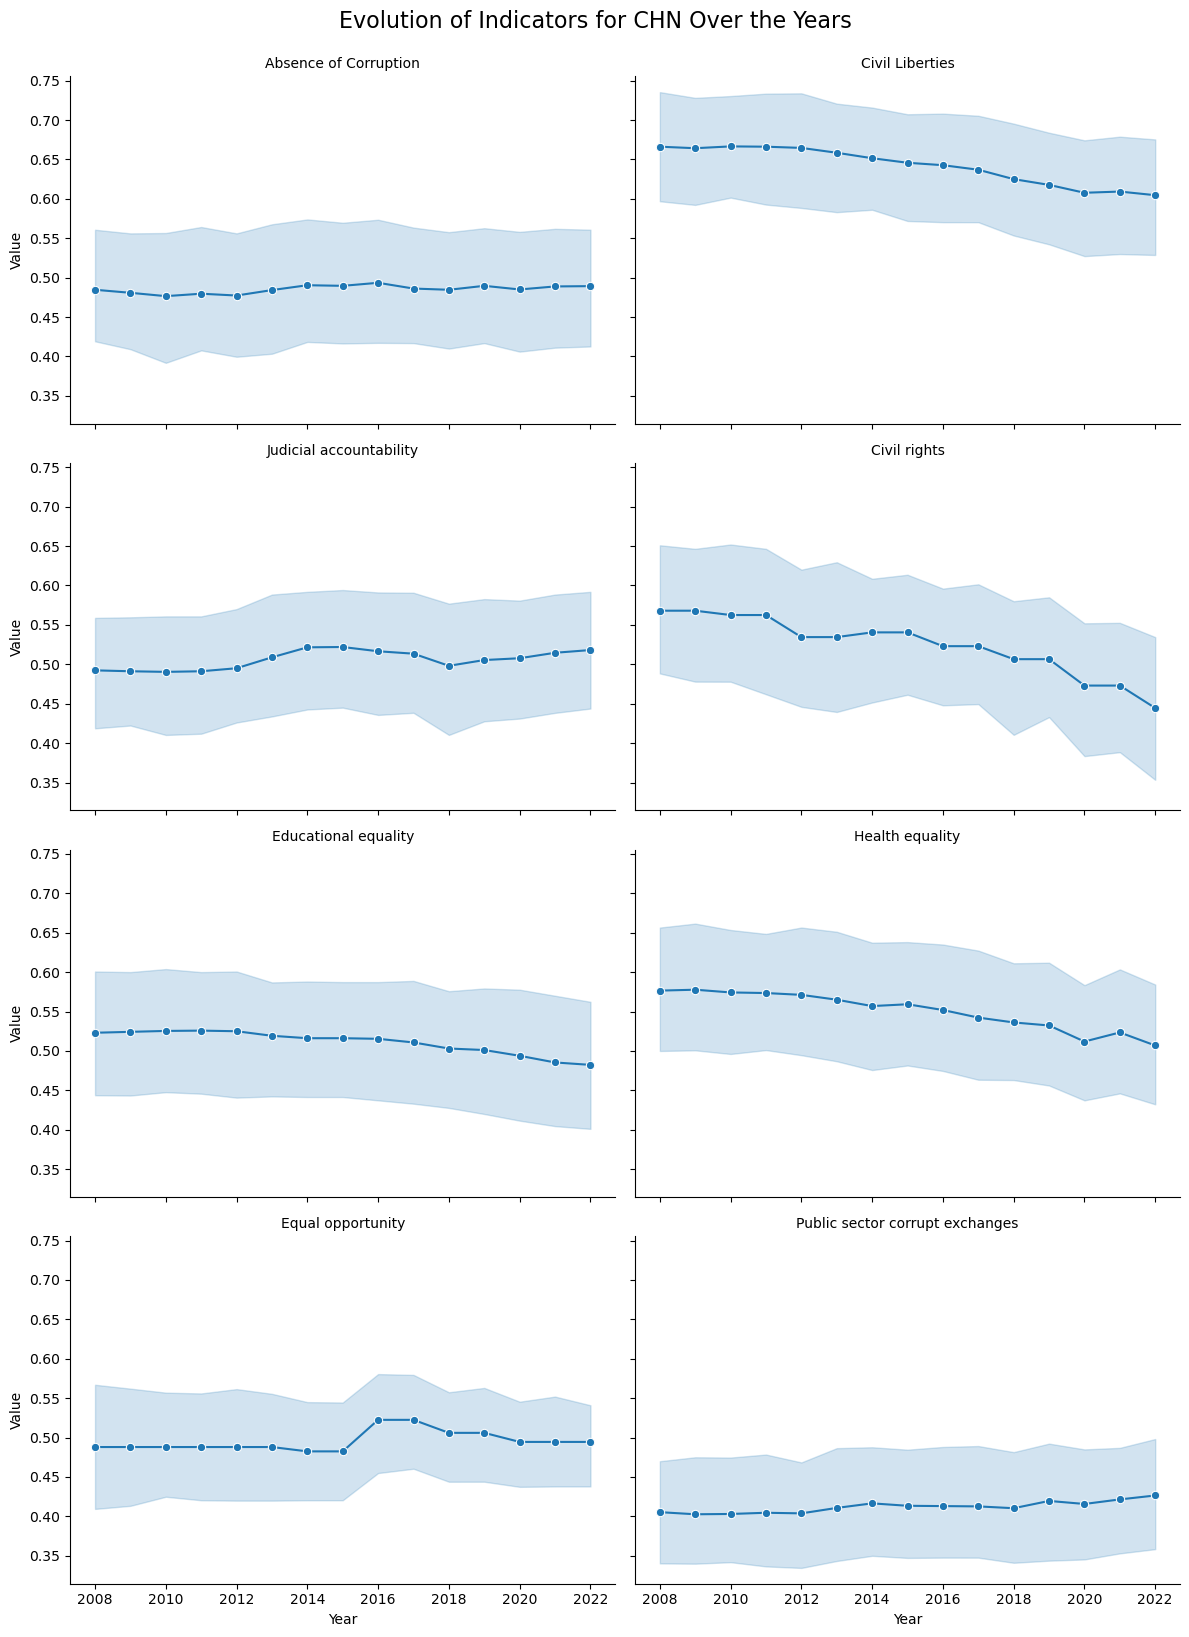

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



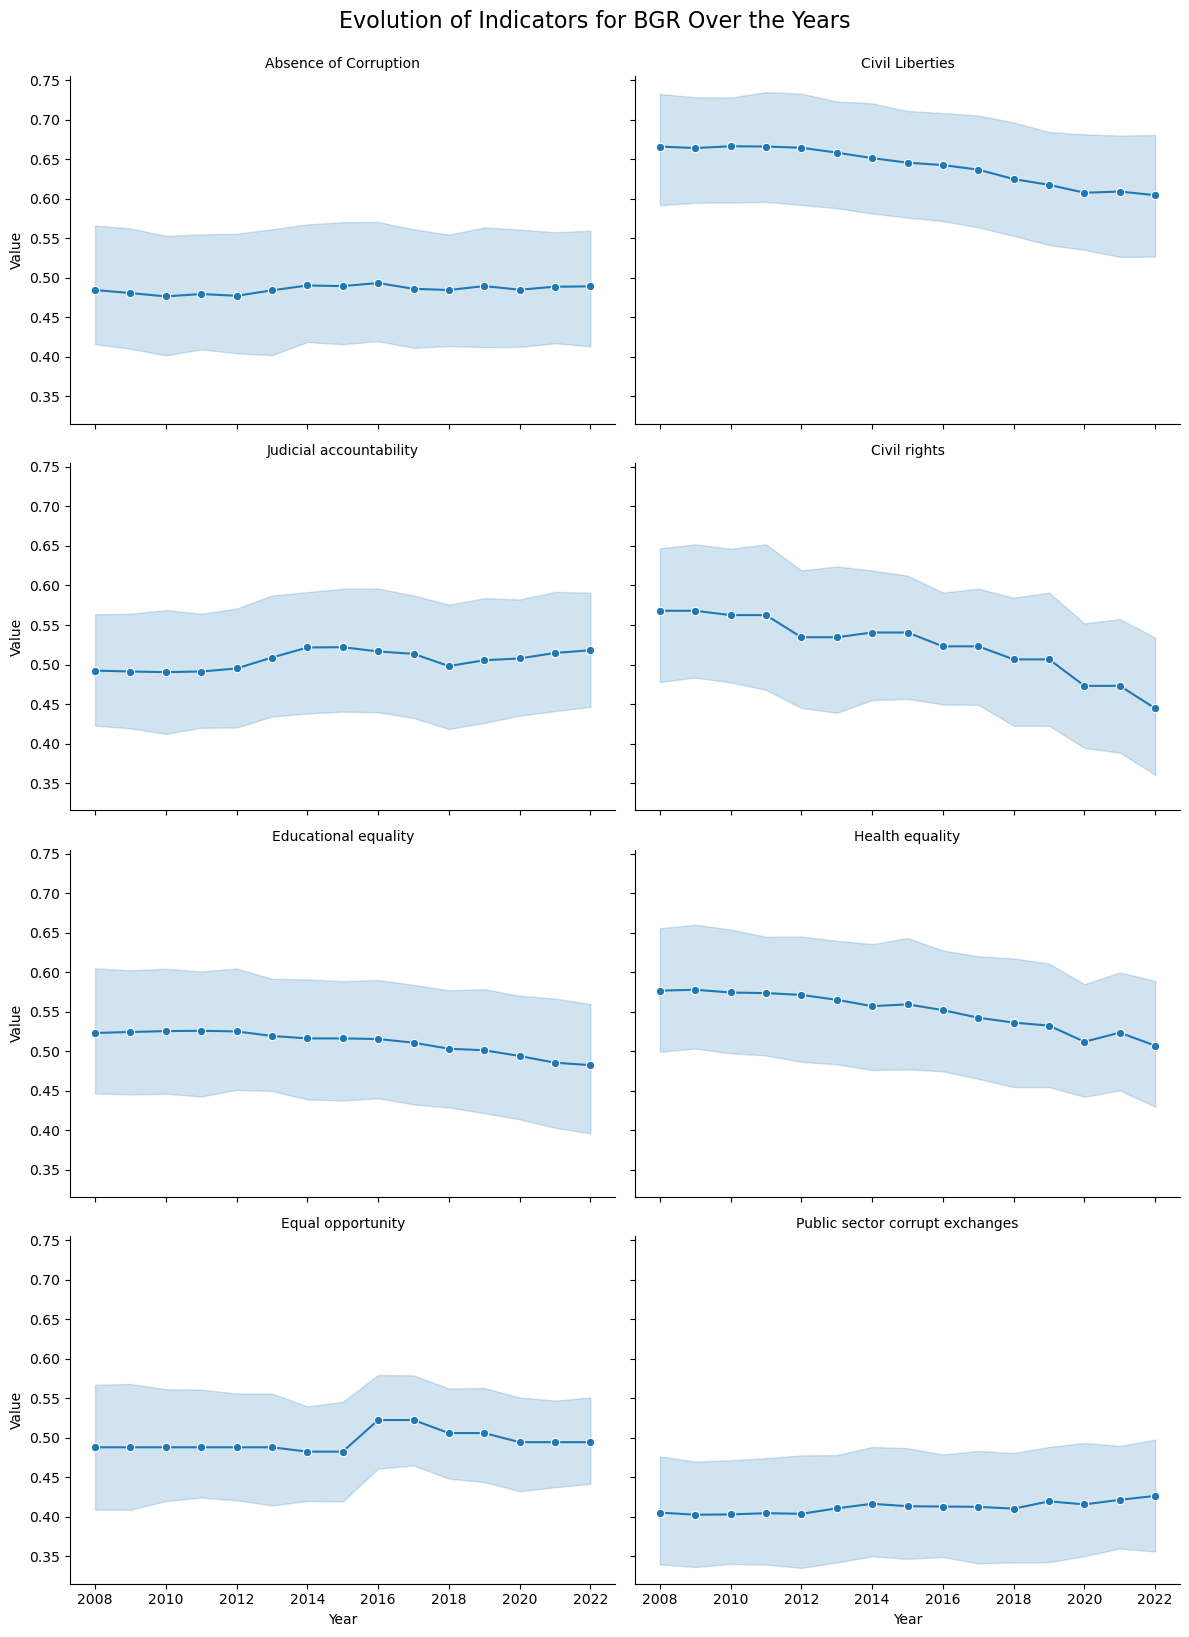

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



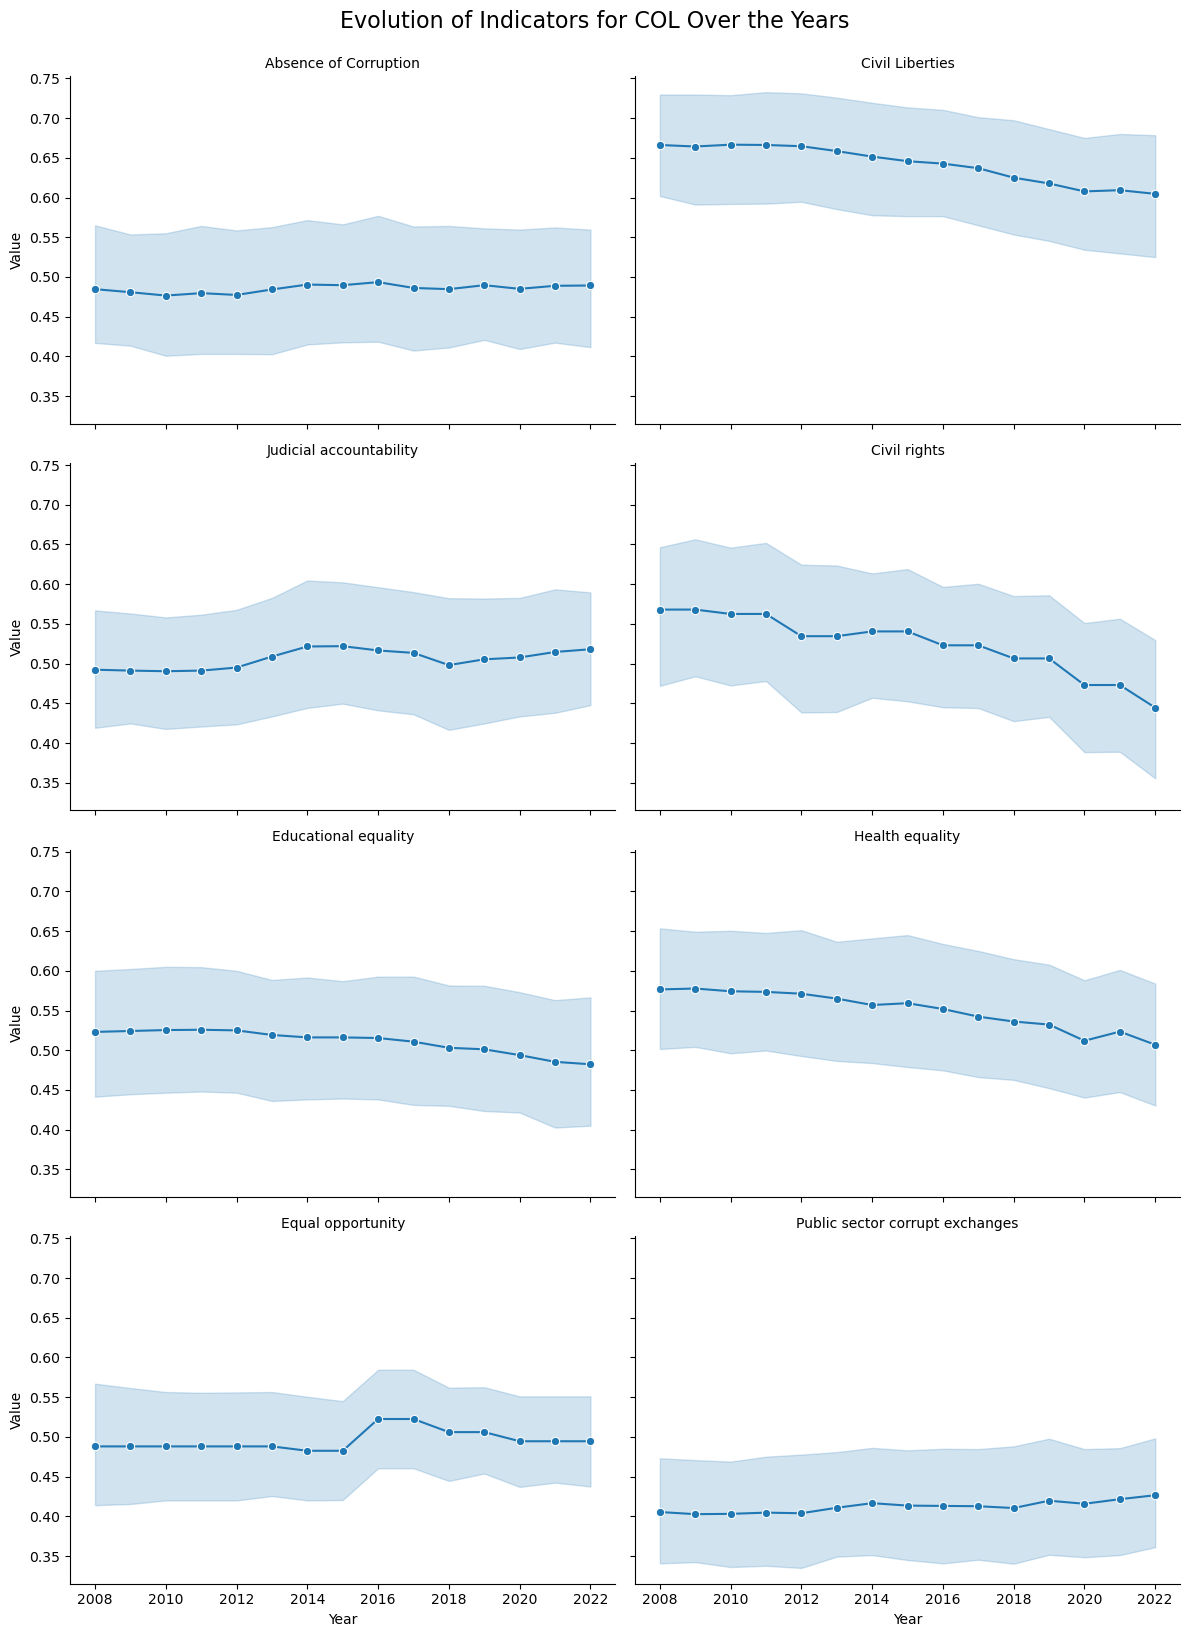

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



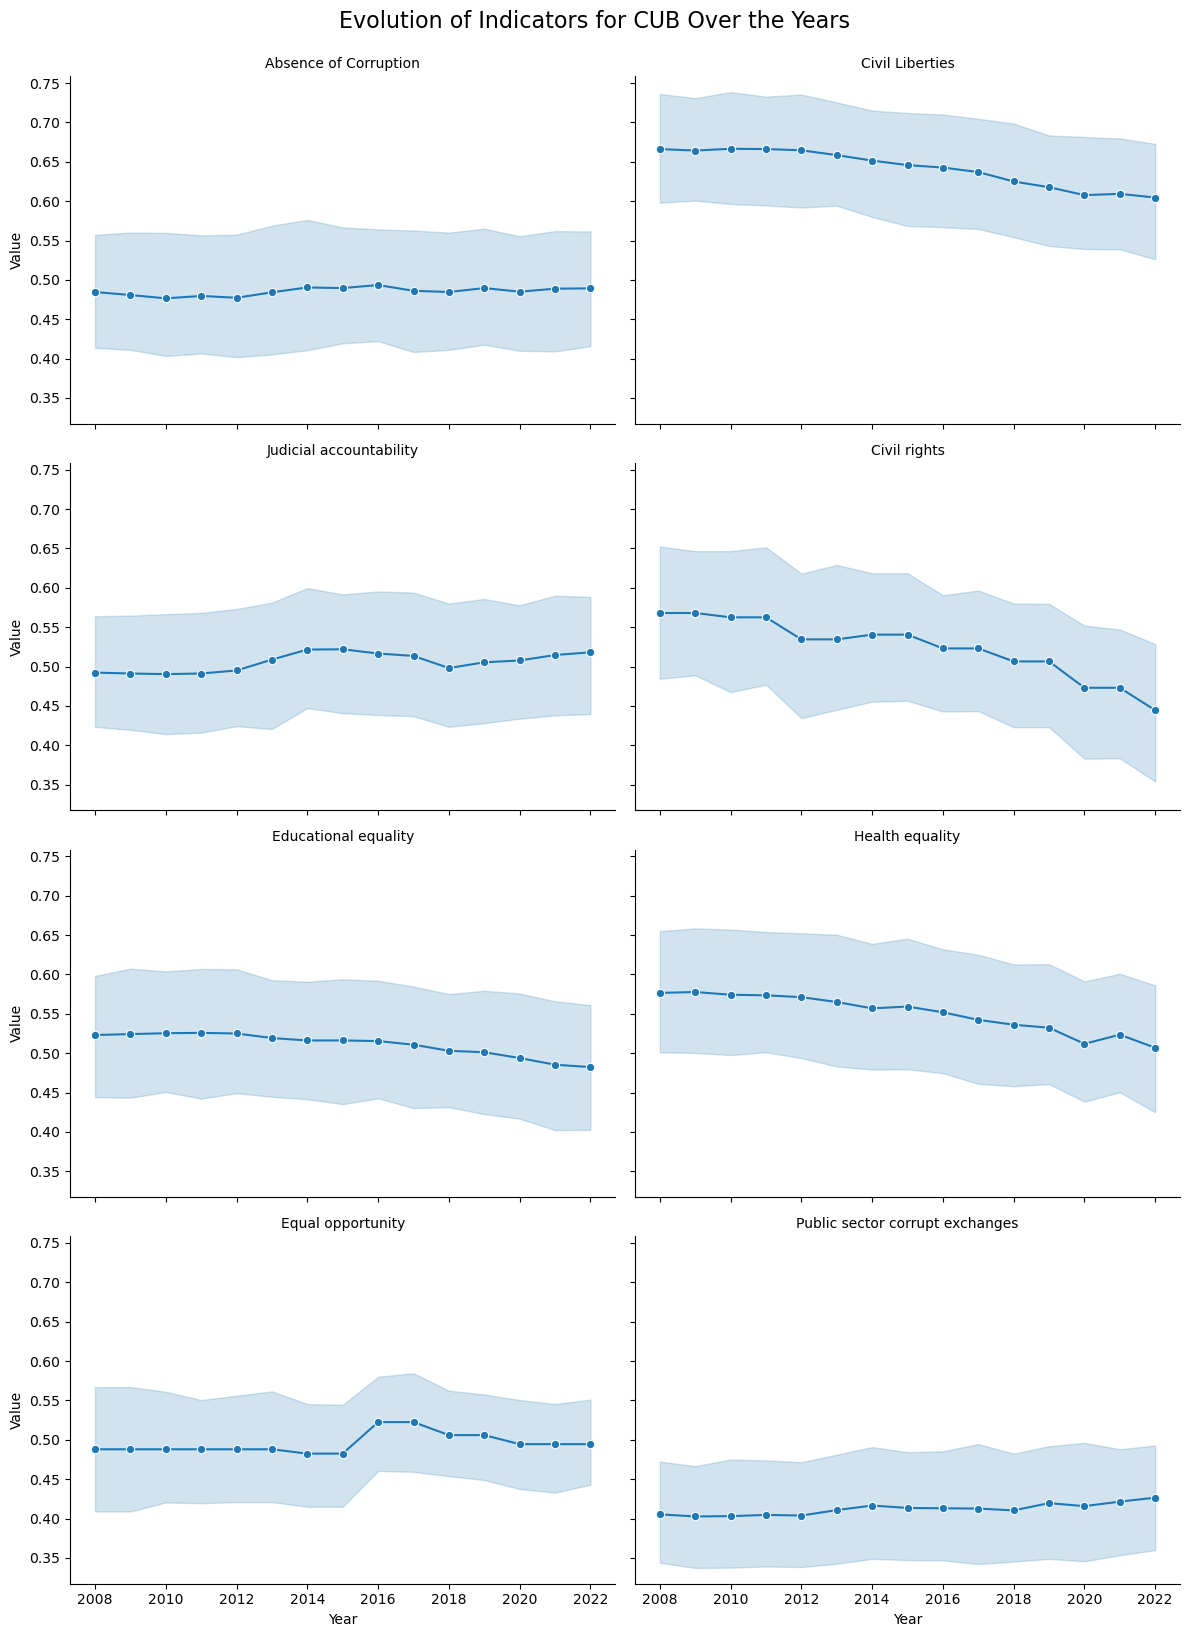

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



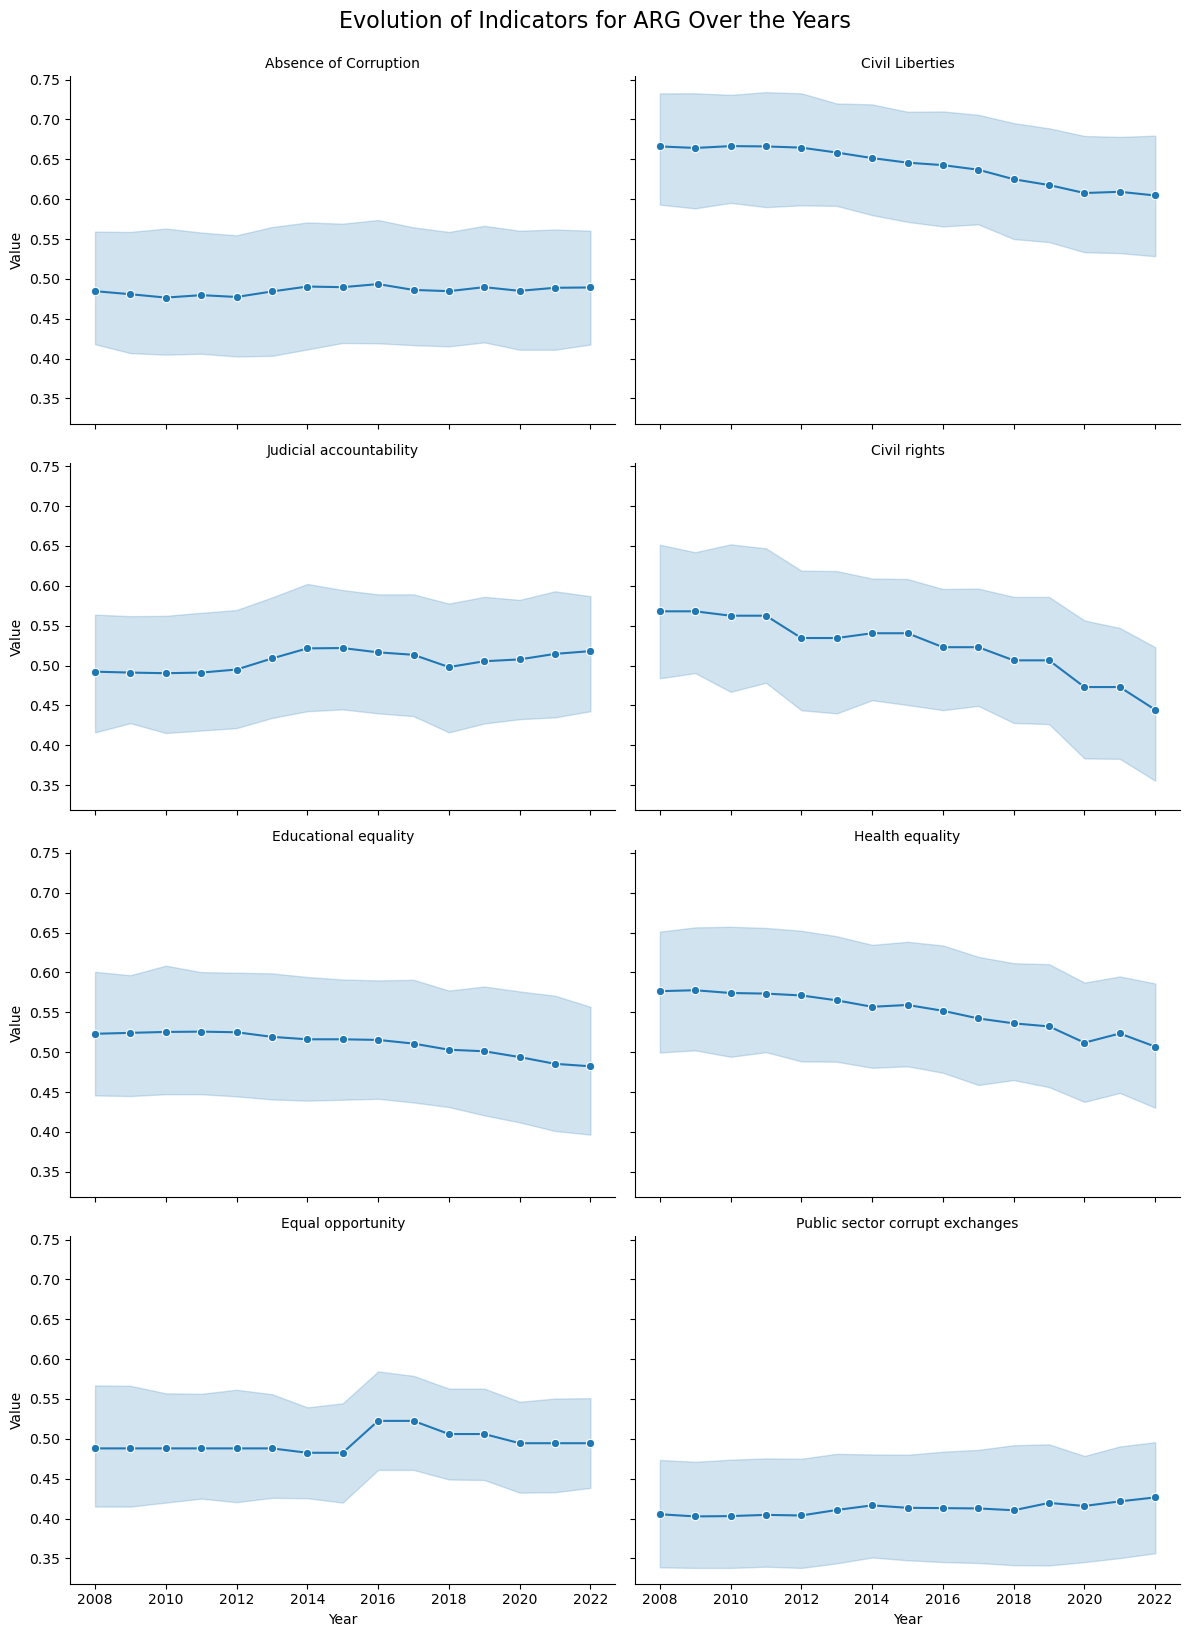

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



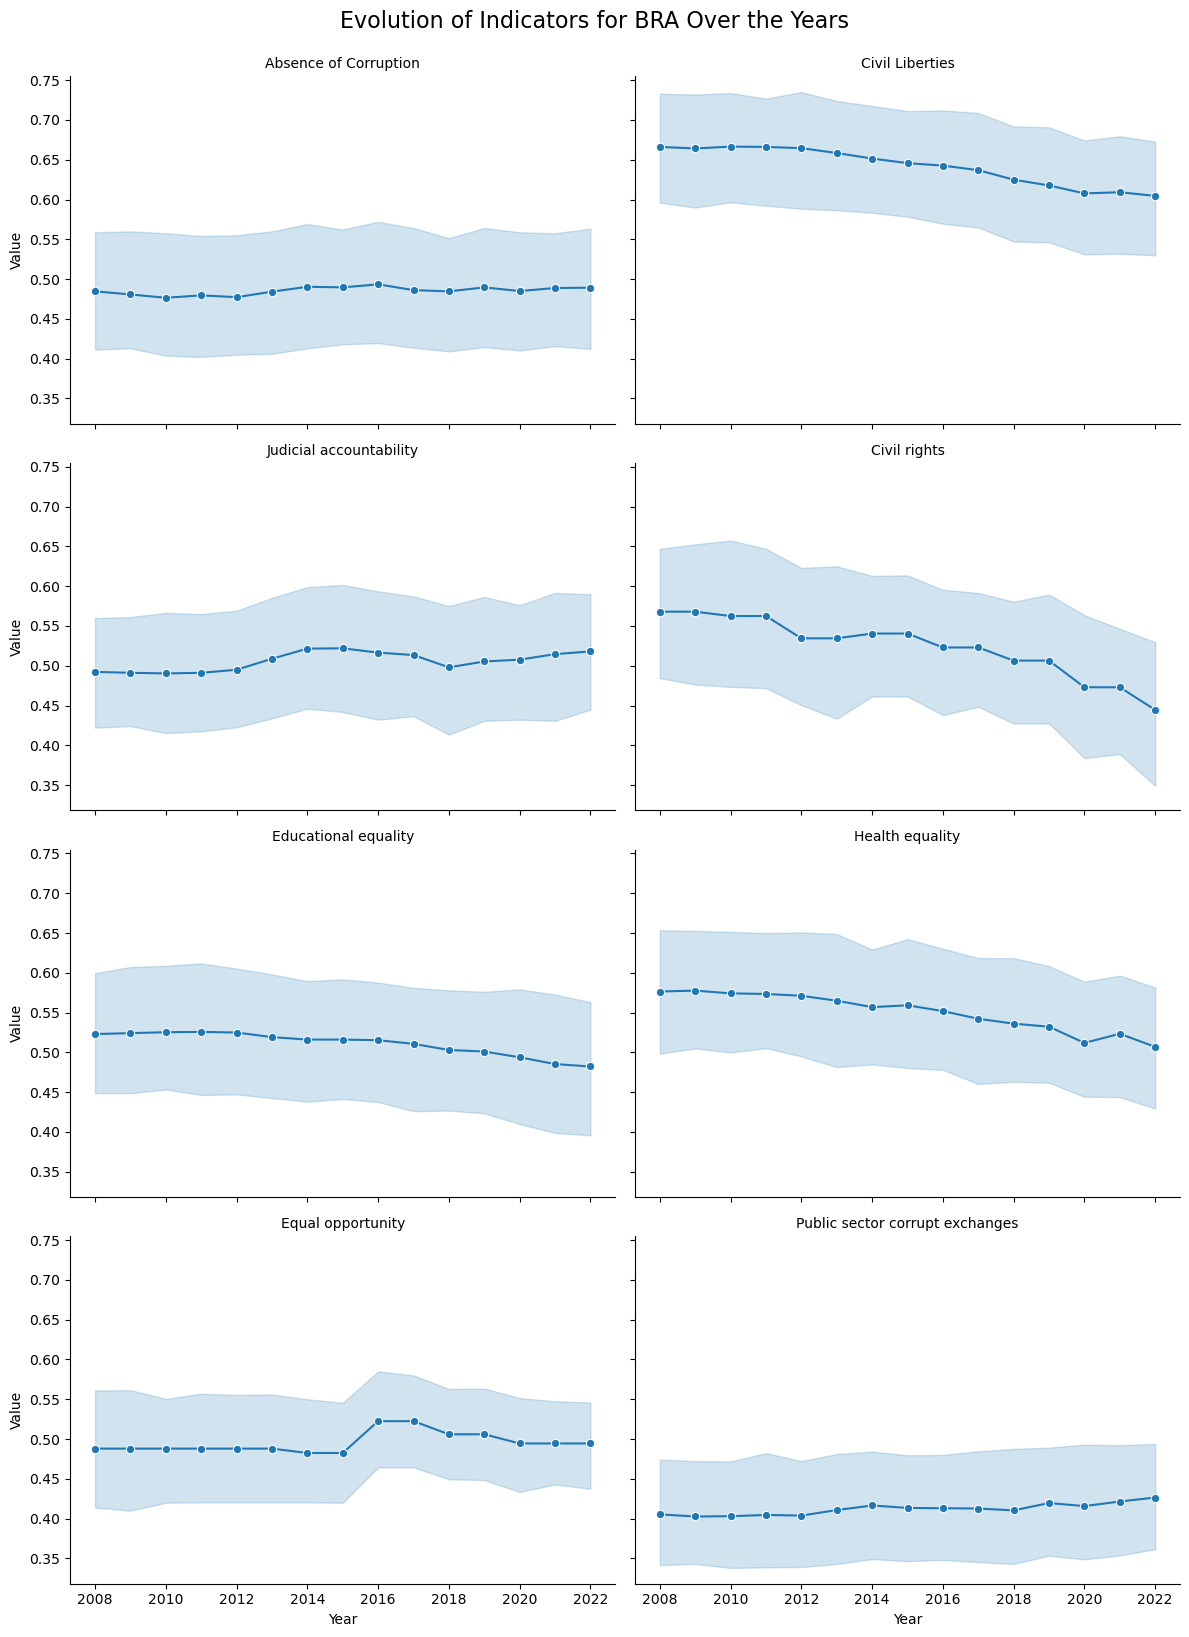

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



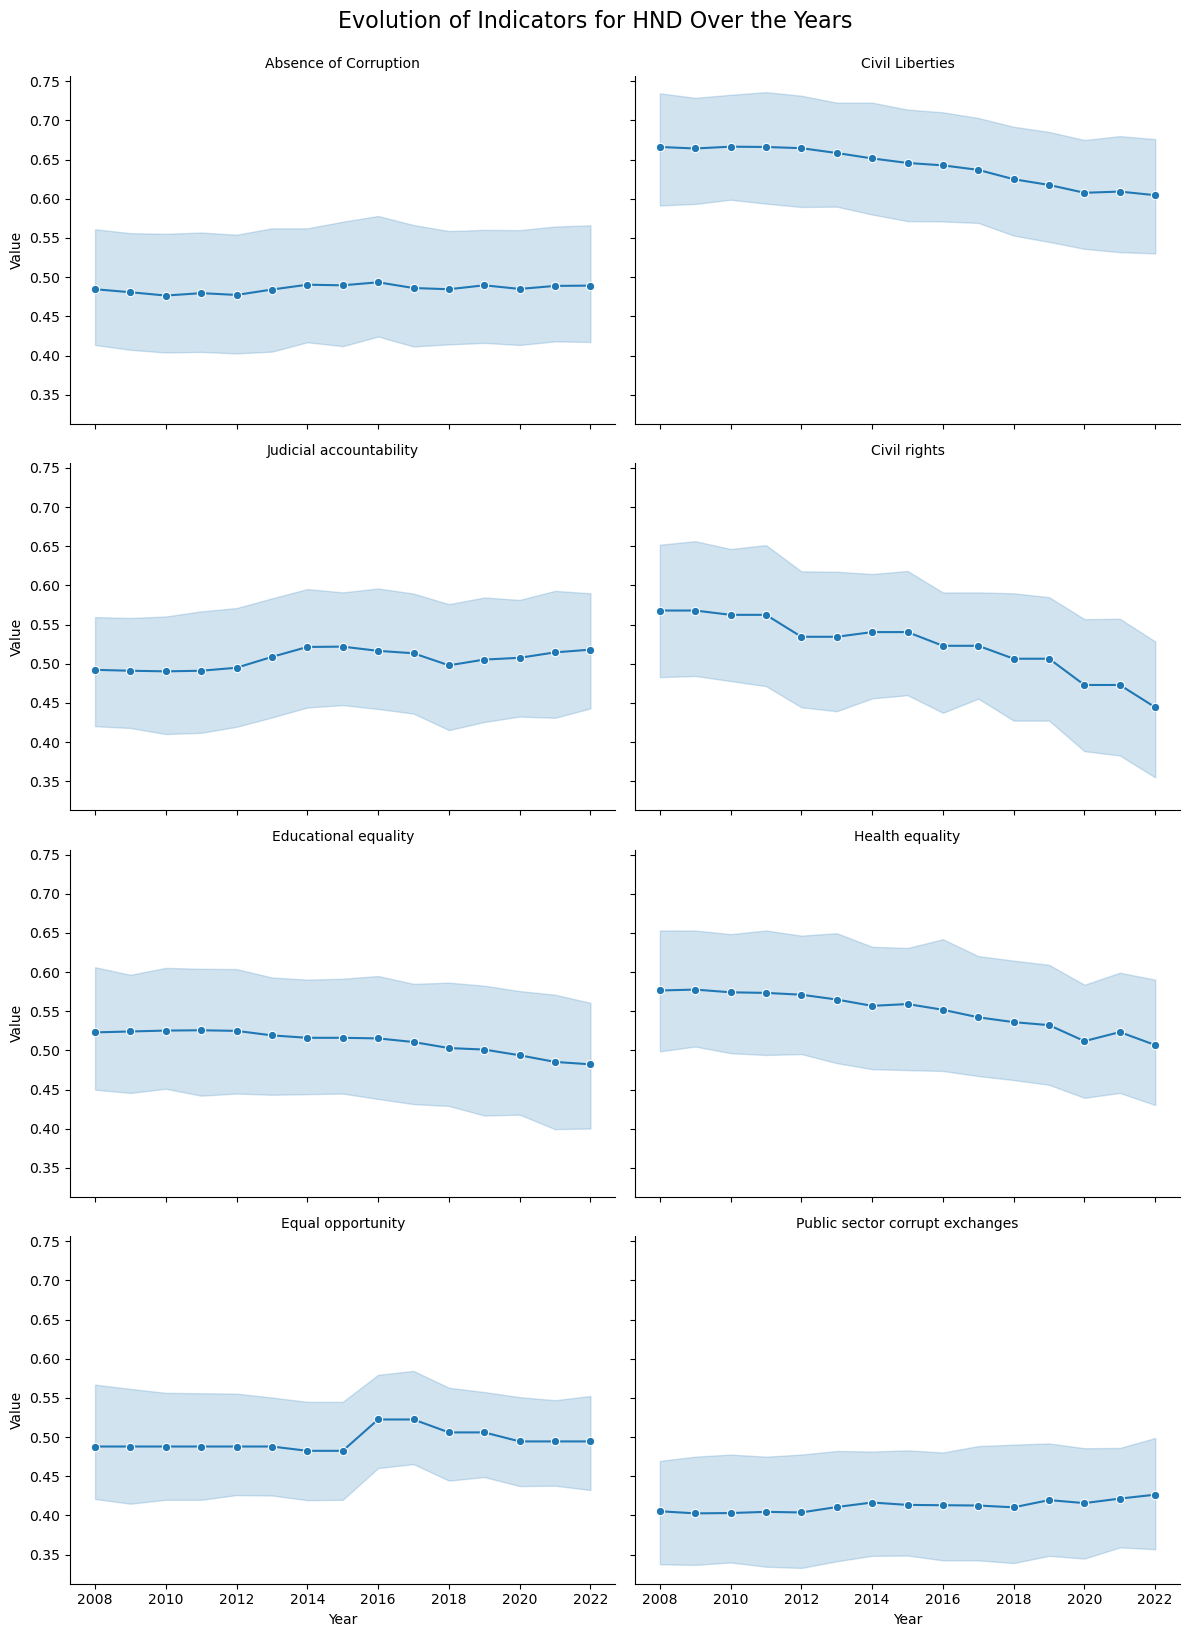

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



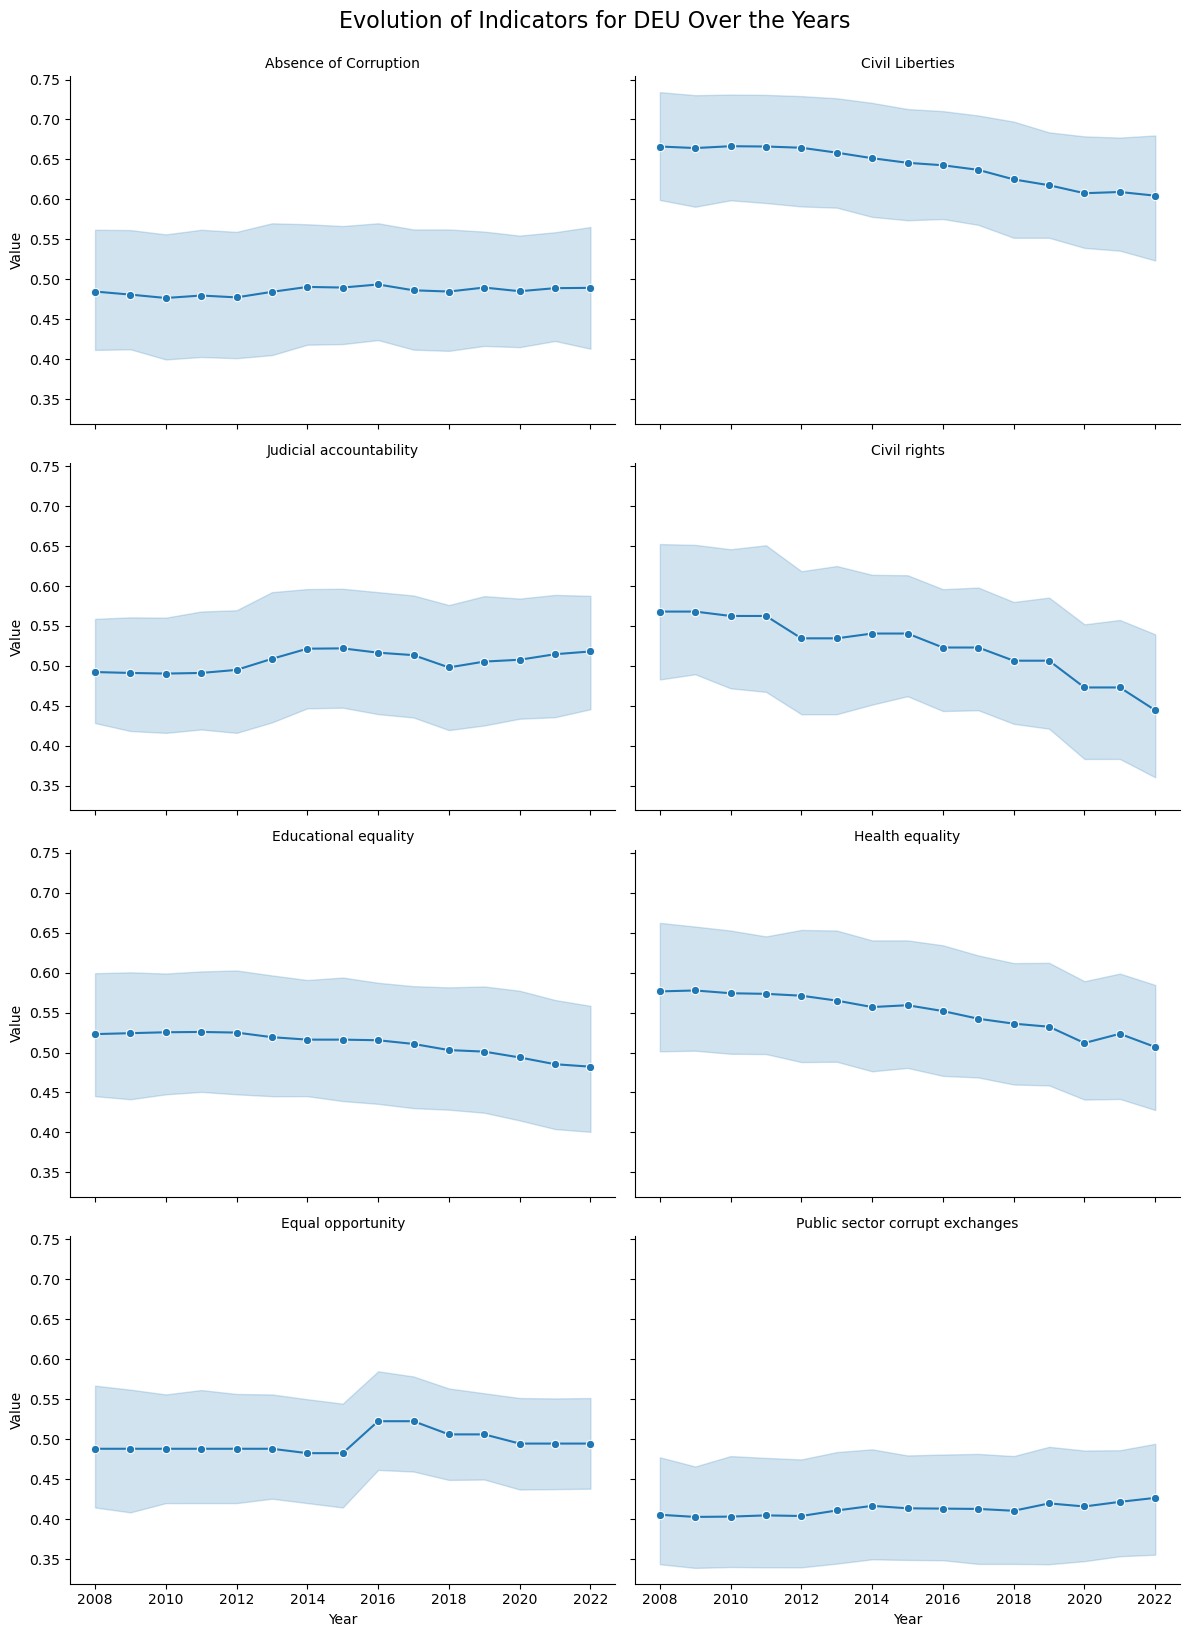

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



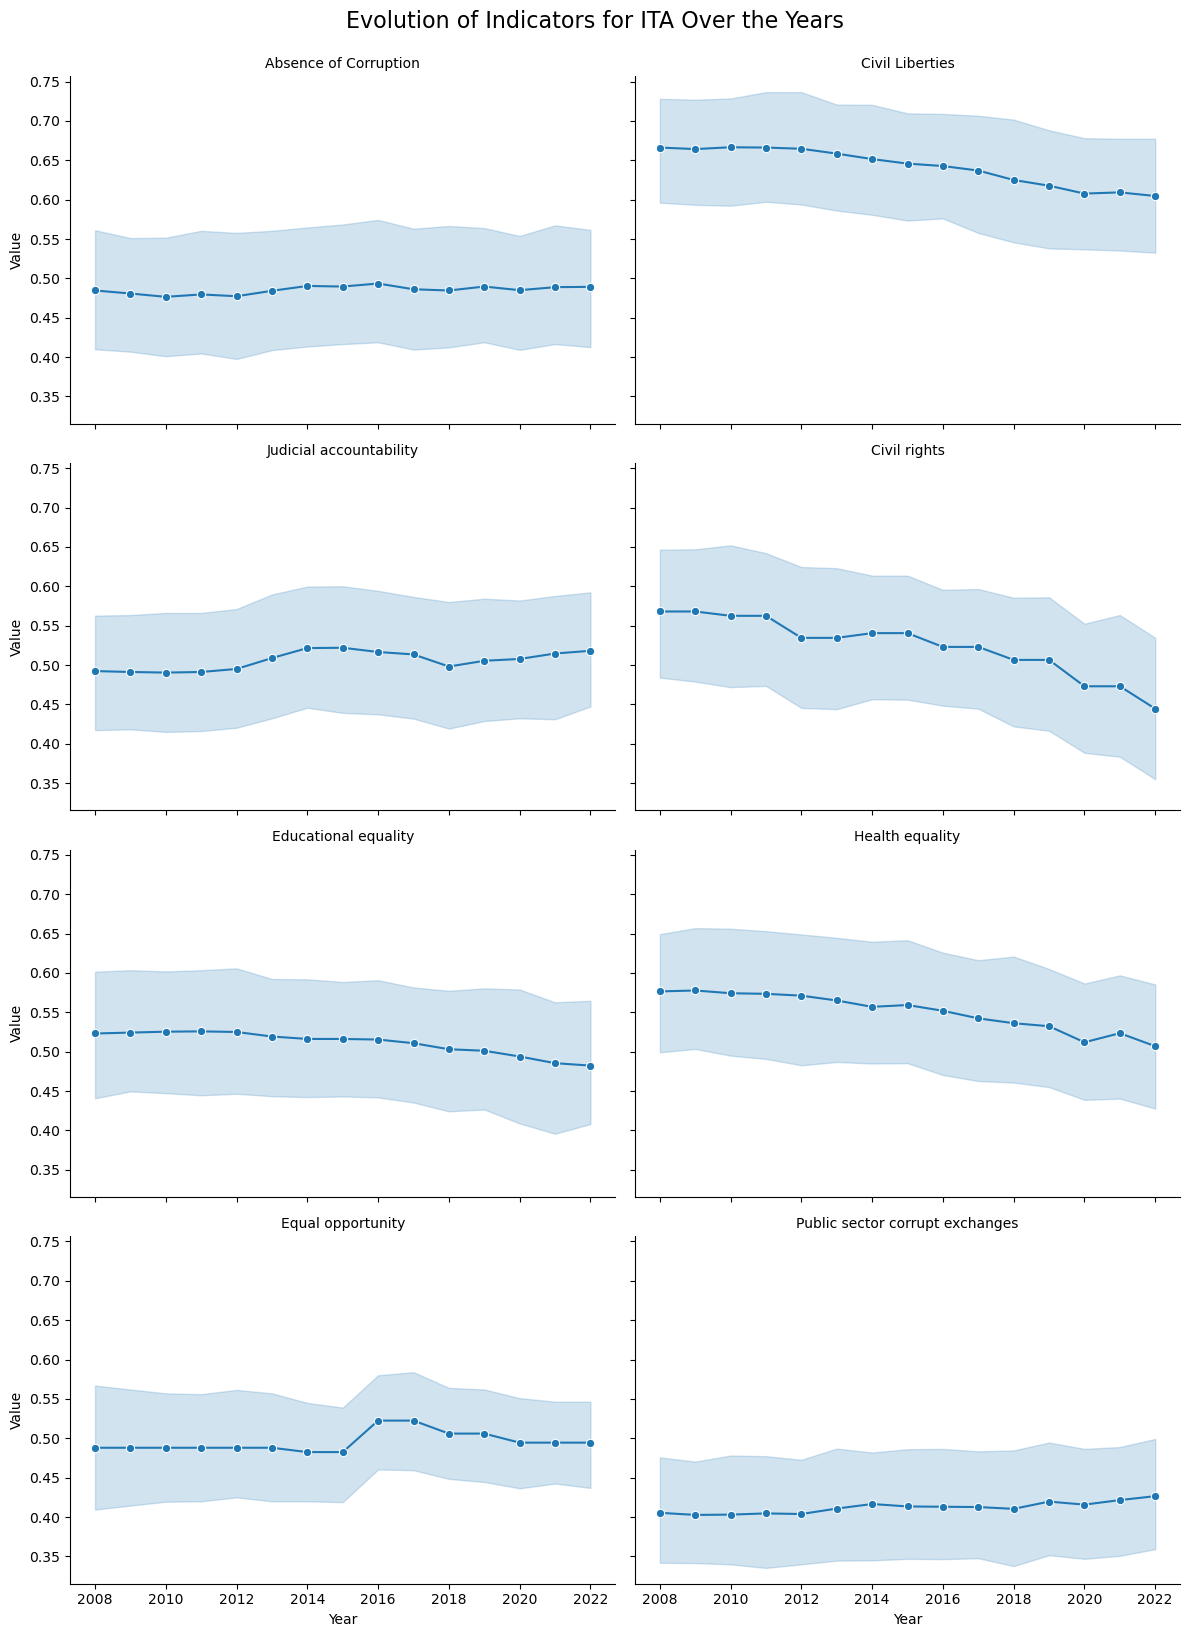

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



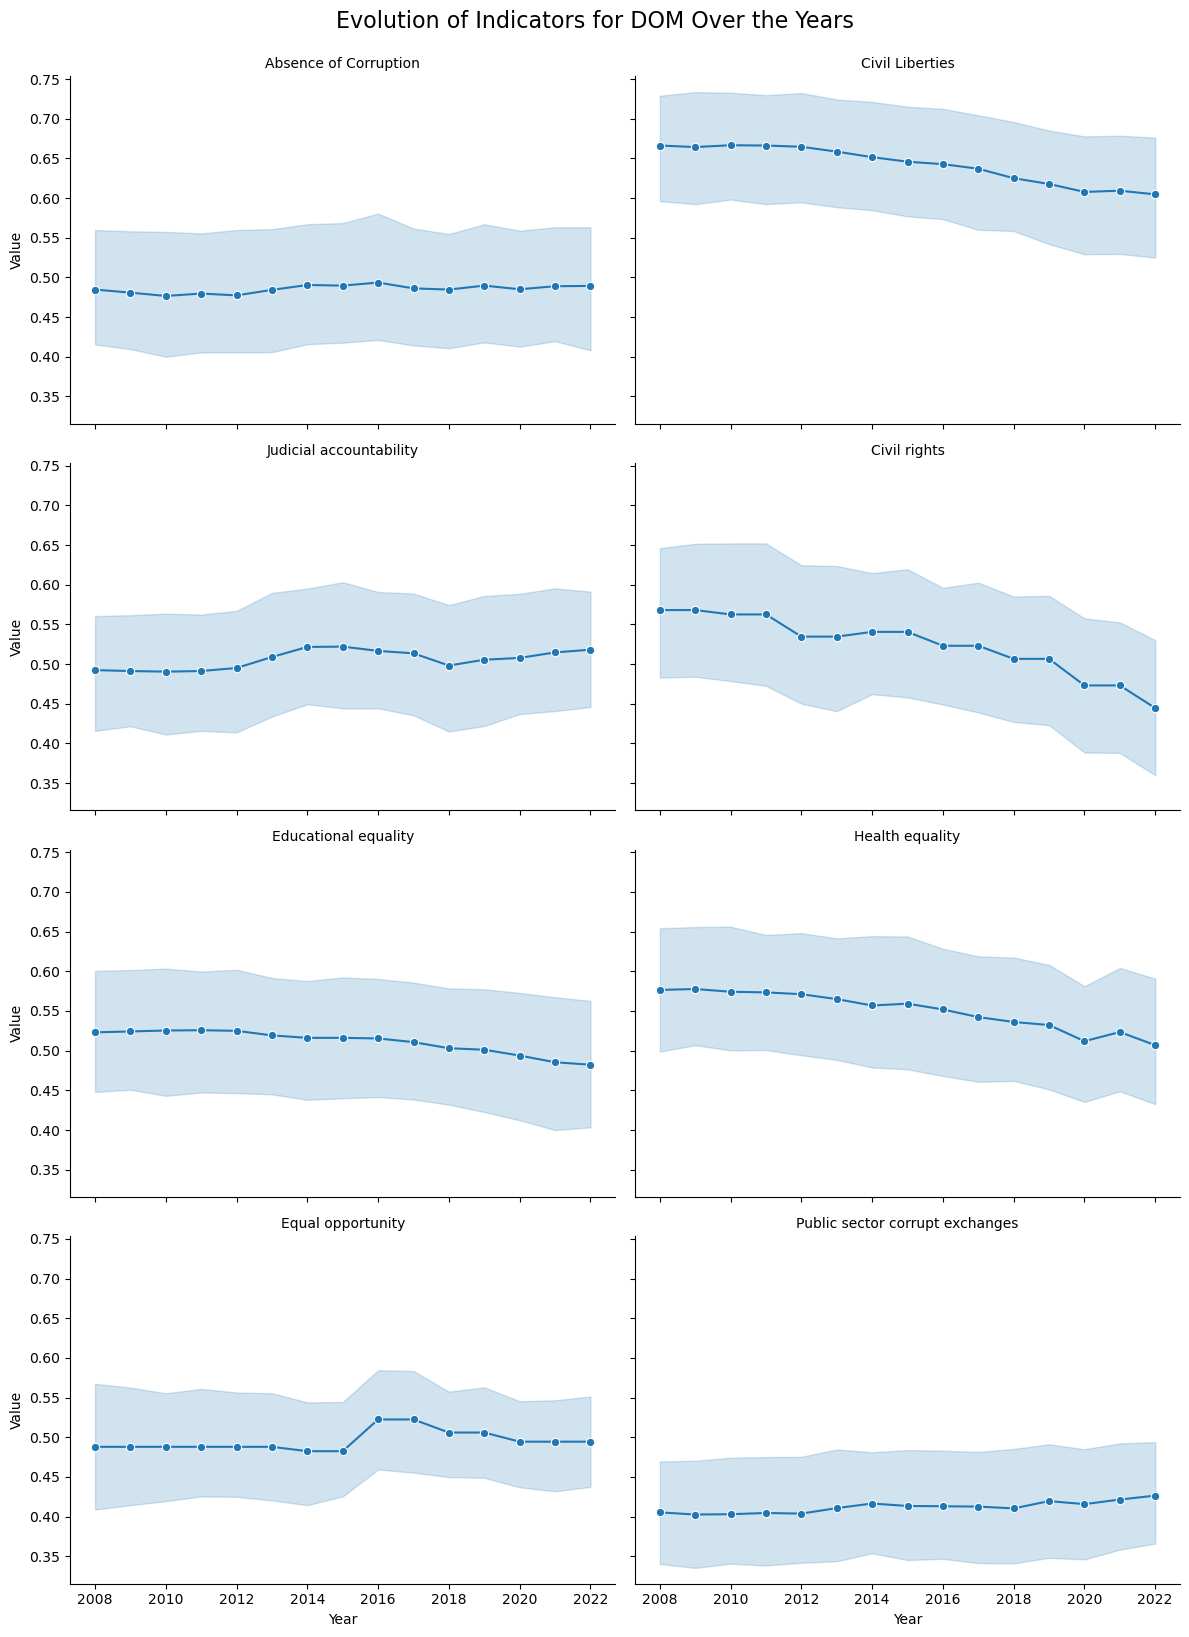

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



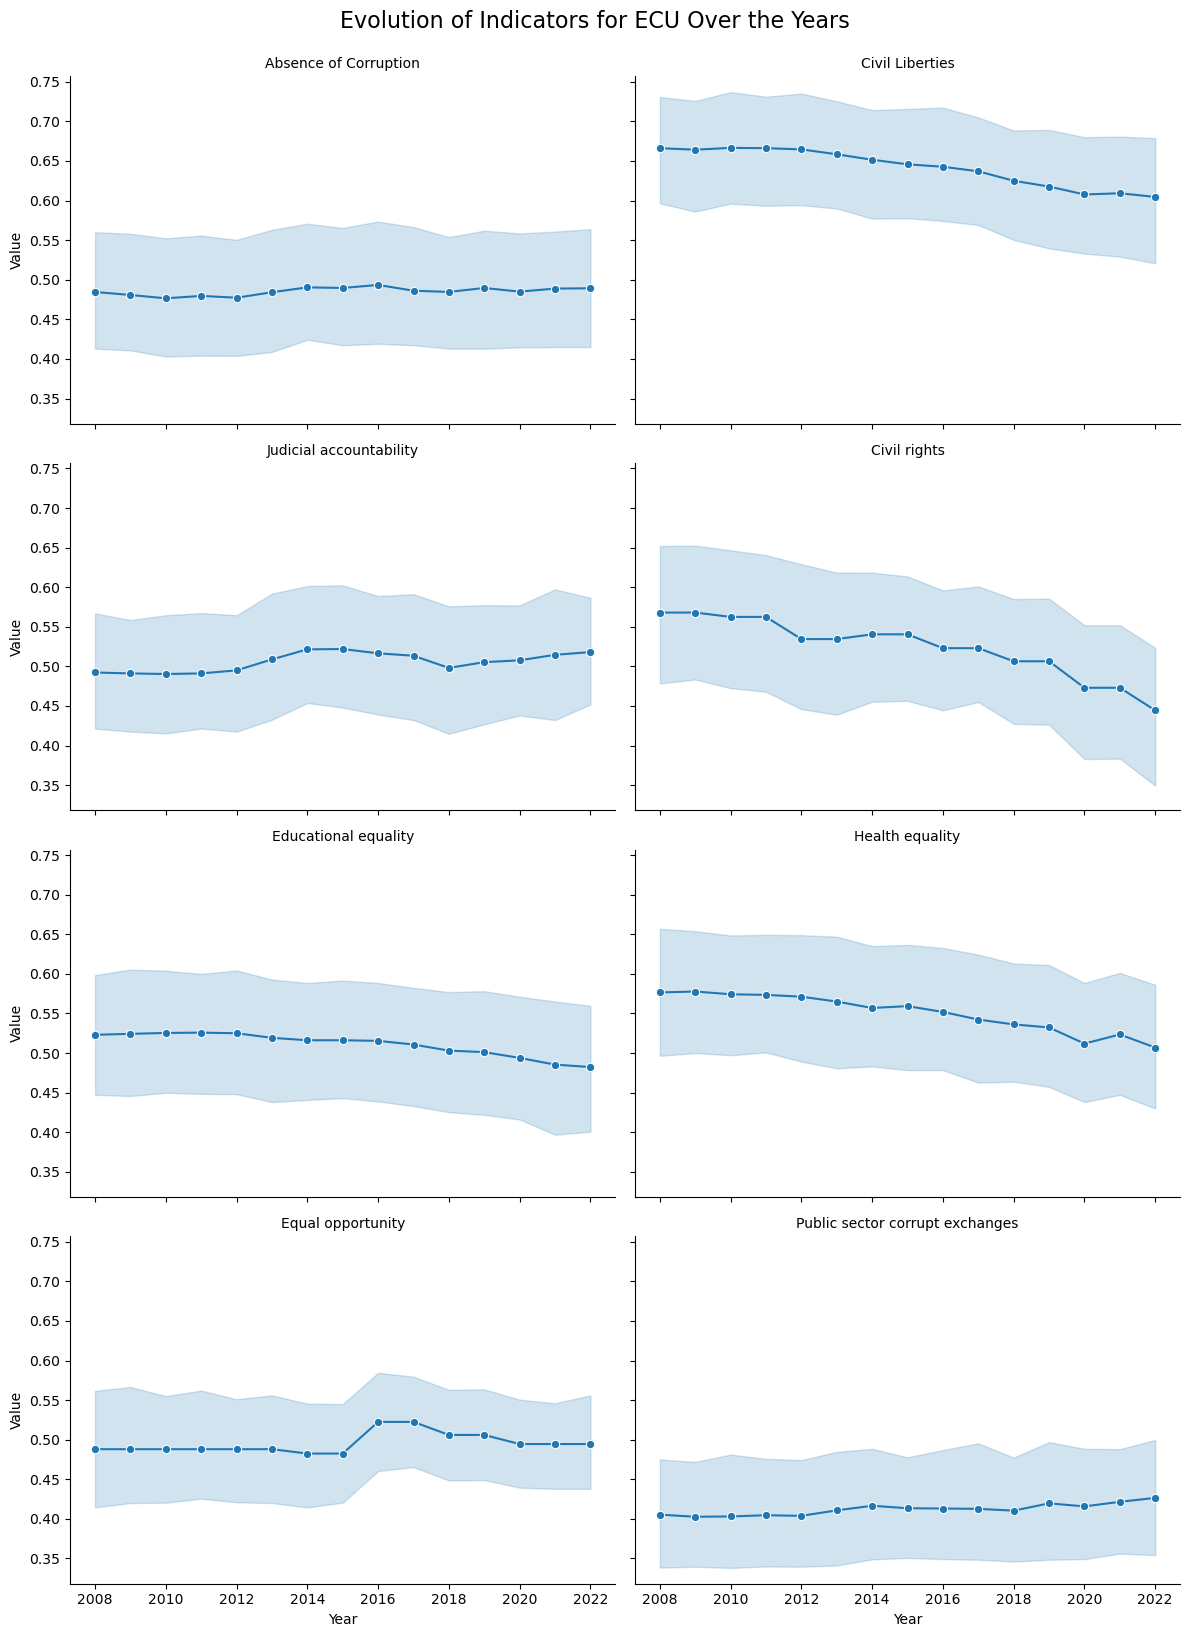

c:\ProgramFiles\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



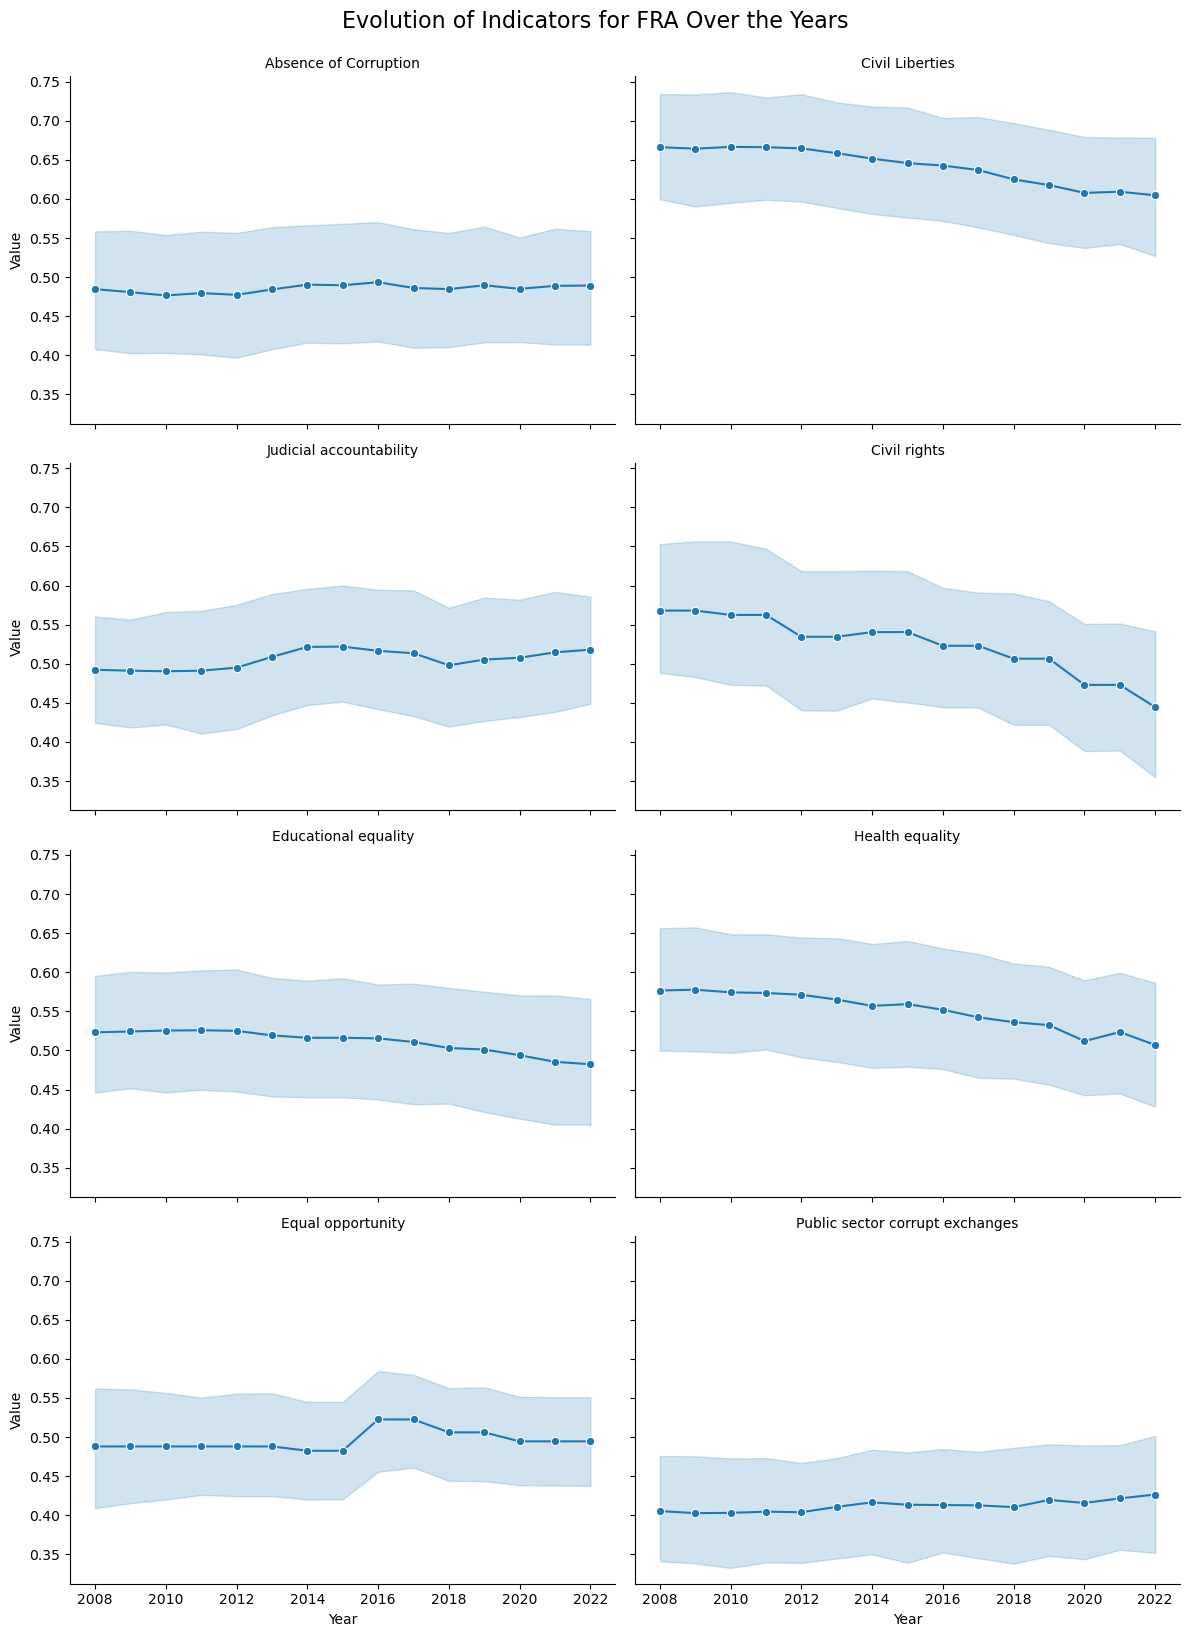

In [44]:
for country in paises:    
    # Creación de una grid facet por cada país
    g = sns.FacetGrid(df2, col='Indicator', col_wrap=2, height=4, aspect=1.5)
    g = g.map(sns.lineplot, 'Year', 'Value', marker="o")

    # nombramos ejes
    g.set_titles("{col_name}")
    g.set_axis_labels("Year", "Value")
    g.fig.suptitle(f'Evolution of Indicators for {country} Over the Years', fontsize=16, y=1.02)
    
    # Despliegue de plots
    plt.show()

En conclusión general, vemos que la mayoría de los países mantienen una calificación baja (50% o menos) respecto al desempeño de sus indicadores. Estos países están teniendo dificultades para garantizar una calidad de vida alta a sus ciudadanos y pueden fungir como un motivo de peso para influir en la decisión de migrar a otros países. Para efectos del estudio, podemos afirmar que los migrantes en España provienen de un trasfondo diverso, muchos marcados por carencias palpables y otros con un nivel de vida alto. ¿Todas las personas que entran en el país tienen los mismos motivos? ¿Aquellos con un trasfondo elevado de calidad de vida lo hacen por mejorarla aún más o es una simple decisión fortuita?

In [45]:
# Exportacion para trabajo en modelo
df2 = df2.pivot_table(
    index=['Country code', 'Year'],
    columns='Indicator',             
    values='Value'                   
).reset_index()
df2

Indicator Country code  Year  Absence of Corruption  Civil Liberties  \
0                  ARG  2008                   0.51             0.80   
1                  ARG  2009                   0.51             0.80   
2                  ARG  2010                   0.51             0.80   
3                  ARG  2011                   0.51             0.80   
4                  ARG  2012                   0.49             0.80   
..                 ...   ...                    ...              ...   
385                VEN  2018                   0.06             0.39   
386                VEN  2019                   0.06             0.37   
387                VEN  2020                   0.00             0.37   
388                VEN  2021                   0.00             0.37   
389                VEN  2022                   0.00             0.37   

Indicator  Civil rights  Educational equality  Equal opportunity  \
0                  0.67                  0.56               0.67   
1                  0.67                  0.56               0.67   
2                  0.67                  0.56               0.67   
3                  0.67                  0.56               0.67   
4                  0.67                  0.56               0.67   
..                  ...                   ...                ...   
385                0.33                  0.23               0.56   
386                0.33                  0.18               0.56   
387                0.11                  0.13               0.44   
388                0.11                  0.17               0.44   
389                0.11                  0.13               0.44   

Indicator  Health equality  Judicial accountability  \
0                     0.62                     0.37   
1                     0.62                     0.37   
2                     0.62                     0.37   
3                     0.62                     0.37   
4                     0.62                     0.37   
..                     ...                      ...   
385                   0.18                     0.01   
386                   0.18                     0.01   
387                   0.18                     0.12   
388                   0.18                     0.07   
389                   0.05                     0.07   

Indicator  Public sector corrupt exchanges  
0                                     0.46  
1                                     0.46  
2                                     0.46  
3                                     0.46  
4                                     0.46  
..                                     ...  
385                                   0.00  
386                                   0.00  
387                                   0.00  
388                                   0.00  
389                                   0.00  

[390 rows x 10 columns]

In [46]:
# Exportación a csv
df2.to_csv("../13 - Exports (preprocesamiento)/libertad.csv", index = False)